In [208]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import metrics

def pca(df_X, df_y):
    pca = PCA(n_components = 2)
    pca.fit(df_X)
    df_pca = pca.transform(df_X)
    df_pca = pd.DataFrame(df_pca, columns = ['comp. 0', 'comp. 1'])
    df_pca['target'] = df_y
    print('variance ratio:', pca.explained_variance_ratio_, 'sum:', sum(pca.explained_variance_ratio_))
    return df_pca

def concat(df_X, df_y):
    df = pd.concat([df_X, df_y], axis=1)
    return df

def concath(df_X, df_y):
    df = pd.concat([df_X, df_y])
    return df

###################################### ADALINE #############################################    
def linear(X,theta):
    z = np.dot(X,theta.T)
    return z

def cost_ada(z,y):              # SSE
    loss = ((y-z)**2).sum()
    return loss/2.0

def gd_ada(X,z,y):              # SSE
    return -np.dot((y-z), X)

def cost_ada2(z,y):              # MSE
    loss = ((y-z)**2).sum()
    return loss/len(y)

def gd_ada2(X,z,y):               # MSE
    return -np.dot((y-z), X)/len(y)

def update_loss(theta,learning_rate,gradient):
    return theta-(learning_rate*gradient)    
    
def predict_ada(X,theta):
    outcome = []
    result = linear(X,theta)
    for i in range(X.shape[0]):
        if result[i] <= 0:
            outcome.append(-1)
        else:
            outcome.append(1)
    return outcome    
    
def plot_cost_function(cost):
    plt.plot(cost,label="loss")
#     plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    

###################################### BCE & Ours ############################################# 

def predict(X,theta):
    outcome = []
    result = sigmoid(X,theta)
    for i in range(X.shape[0]):
        if result[i] <= threshold:
            outcome.append(0)
        else:
            outcome.append(1)
    return outcome  

def predict_ours(X,theta):
    outcome = []
    result = sigmoid_2(sigmoid(X,theta))
    for i in range(X.shape[0]):
        if result[i] <= threshold:
            outcome.append(0)
        else:
            outcome.append(1)
    return outcome    

def sigmoid(X,theta):
    z = np.dot(X,theta.T).astype(float)
    return 1.0/(1+np.exp(-z))

def sigmoid_2(p):
    s = (L*(p-0.5)).astype(float)
    return 1.0/(1+np.exp(-s))

def cost_function(h,y):
    loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()
    return loss

def gradient_descent(X,h,y,yl):
    return np.dot(X.T,(h-y))/yl

def cost_function_new(bs,syh,syhy,bs_sy):
    loss = (1+bs)*syhy / ( bs_sy + syh )  # f_score
    return 1-loss

def gradient_descent_new(p,X,yh,y,bs,syh,syhy,bs_sy):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return -( (1+bs) * (np.dot(y*yp_pz*(bs_sy+syh), X) - np.dot(yp_pz*syhy, X)) ) / ( (bs_sy + syh)**2 )

def cost_function_acc(sy,syh,syhy,yl):
    loss = (yl-sy-syh+2*syhy)/yl   # accyracy
    return 1-loss

def gradient_descent_acc(p,X,yh,y,yl):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return (np.dot(yp_pz, X) - 2*np.dot(y*yp_pz, X)) / yl

def cost_function_pre(syh,syhy):
    loss = syhy/syh  # precision
    return 1-loss

def gradient_descent_pre(p,X,yh,y,syh,syhy):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return (-np.dot(y*yp_pz, X)*syh + np.dot(yp_pz, X)*syhy) / (syh**2)

def cost_function_rec(sy,syhy):
    loss = syhy/sy  # recall
    return 1-loss

def gradient_descent_rec(p,X,yh,y,sy):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return -np.dot(y*yp_pz, X) / sy

def cost_function_gmean(sy,syh,syhy,yl):
    loss = (syhy*(yl-syh-sy+syhy)/(sy*(yl-sy)))**0.5  # gmean
    return 1-loss

def gradient_descent_gmean(p,X,yh,y,sy,syh,syhy,yl):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    repeat1 = np.dot(y*yp_pz, X)
    repeat2 = yl-syh-sy+syhy
    return -2*( (repeat1*repeat2) + (-np.dot(yp_pz, X)+repeat1)*syhy ) / (sy*(yl-sy)*syhy*(repeat2))**0.5

def cost_function_balacc(sy,syh,syhy,yl):
    loss = (yl*(syhy+sy)-sy*(syh+sy)) / (2*sy*(yl-sy))     # balanced accuracy
    return 1-loss

def gradient_descent_balacc(p,X,yh,y,sy,yl):
    yp_pz = L*yh*(1-yh) * p*(1-p)
    return -(yl*np.dot(y*yp_pz, X)-sy*np.dot(yp_pz, X))/(2*sy*(yl-sy))

# 1. My own data(2d / 10,000)

In [209]:
from sklearn import datasets
import numpy as np
import pandas as pd
Init_X, Init_y = datasets.make_classification(n_samples=10000, n_classes=2, weights=[0.9, 0.1], class_sep=1.2,
                                    n_features=5, n_informative=3, n_redundant=1, n_clusters_per_class=1, random_state=0)
X = np.array(Init_X)
y = np.array(Init_y)

df_pca = pca(X, y)
df_pca

variance ratio: [0.42833444 0.25307059] sum: 0.6814050304383261


,comp. 0,comp. 1,target
0,1.695416,1.809229,0
1,0.982001,-1.214855,0
2,-0.817025,0.504334,0
3,-0.235227,-0.039080,0
4,-0.534662,-2.206977,0
...,...,...,...
9995,-1.686589,1.869398,1
9996,-0.455202,0.290077,0
9997,-0.970592,-1.940881,0
9998,-2.826011,0.173755,0


In [237]:
ada_acc = []
ada_f1 = []
ada_f5 = []
ada_f2 = []
ada_gmean = []
ada_bacc = []

mse_acc = []
mse_f1 = []
mse_f5 = []
mse_f2 = []
mse_gmean = []
mse_bacc = []

bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []
bce_train_acc = []
bce_train_f1 = []
bce_train_f5 = []
bce_train_f2 = []
bce_train_gmean = []
bce_train_bacc = []

acc_acc = []
acc_f1 = []
acc_f5 = []
acc_f2 = []
acc_gmean = []
acc_bacc = []

f1_acc = []
f1_f1 = []
f1_f5 = []
f1_f2 = []
f1_gmean = []
f1_bacc = []

f05_acc = []
f05_f1 = []
f05_f5 = []
f05_f2 = []
f05_gmean = []
f05_bacc = []

f2_acc = []
f2_f1 = []
f2_f5 = []
f2_f2 = []
f2_gmean = []
f2_bacc = []

gmean_acc = []
gmean_f1 = []
gmean_f5 = []
gmean_f2 = []
gmean_gmean = []
gmean_bacc = []

bacc_acc = []
bacc_f1 = []
bacc_f5 = []
bacc_f2 = []
bacc_gmean = []
bacc_bacc = []

a = 0.2
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=a, random_state=0)
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=a, random_state=0)

8057 943 9000
################################################## 1th CV ##################################################
8057 1611 9668


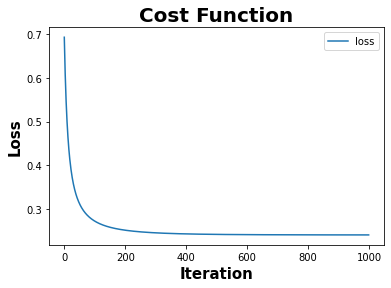

TN, FP, FN, TP: 7710 347 613 998
Accuracy = 0.9007033512618949
F1 = 0.6752368064952639
F0.5 = 0.713774853382921
F2 = 0.6406470663756579
Gmean = 0.7699419943055955
Balanced Accu. = 0.788211429936624
Accuracy = 0.917
F1 = 0.6028708133971292
F0.5 = 0.601145038167939
F2 = 0.6046065259117082
Gmean = 0.7598511683724143
Balanced Accu. = 0.7794471153846154
8057 943 9000
################################################## 2th CV ##################################################
8057 1611 9668


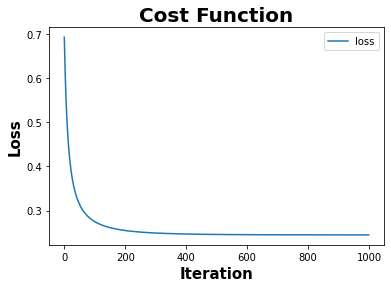

TN, FP, FN, TP: 7715 342 629 982
Accuracy = 0.8995655771617708
F1 = 0.6691652470187394
F0.5 = 0.7108730273635443
F2 = 0.6320803295571575
Gmean = 0.7639927847526685
Balanced Accu. = 0.7835558594116856
Accuracy = 0.927
F1 = 0.663594470046083
F0.5 = 0.6474820143884891
F2 = 0.6805293005671077
Gmean = 0.8127905228691671
Balanced Accu. = 0.8232743818681318
8057 943 9000
################################################## 3th CV ##################################################
8057 1611 9668


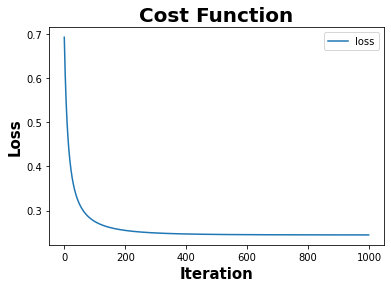

TN, FP, FN, TP: 7711 346 619 992
Accuracy = 0.9001861812163839
F1 = 0.6727704306544592
F0.5 = 0.7123366365072527
F2 = 0.6373682857877152
Gmean = 0.7676738297297316
Balanced Accu. = 0.7864112903816052
Accuracy = 0.918
F1 = 0.6019417475728155
F0.5 = 0.60546875
F2 = 0.5984555984555985
Gmean = 0.7546786303883496
Balanced Accu. = 0.7757554945054945
8058 942 9000
################################################## 4th CV ##################################################
8058 1611 9669


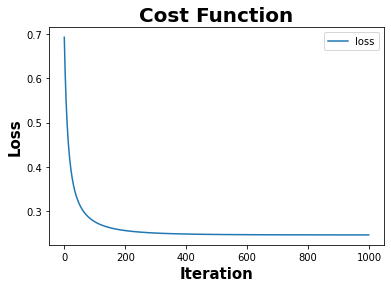

TN, FP, FN, TP: 7723 335 605 1006
Accuracy = 0.9027820870824284
F1 = 0.6815718157181572
F0.5 = 0.7211469534050179
F2 = 0.6461143224149004
Gmean = 0.7736251965572126
Balanced Accu. = 0.7914416338159147
Accuracy = 0.913
F1 = 0.5492227979274611
F0.5 = 0.5798687089715536
F2 = 0.5216535433070867
Gmean = 0.6964356484248305
Balanced Accu. = 0.7328278797552541
8058 942 9000
################################################## 5th CV ##################################################
8058 1611 9669


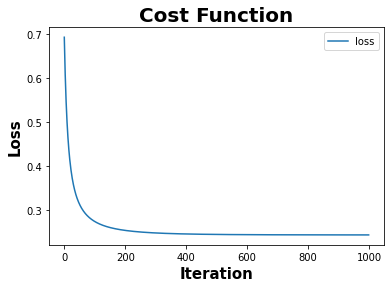

TN, FP, FN, TP: 7703 355 628 983
Accuracy = 0.8983348846830076
F1 = 0.6666666666666666
F0.5 = 0.7058739049260376
F2 = 0.631585710614238
Gmean = 0.7637395941927179
Balanced Accu. = 0.783062207746168
Accuracy = 0.937
F1 = 0.676923076923077
F0.5 = 0.7096774193548387
F2 = 0.6470588235294118
Gmean = 0.7821226770037292
Balanced Accu. = 0.800877893056664
8058 942 9000
################################################## 6th CV ##################################################
8058 1611 9669


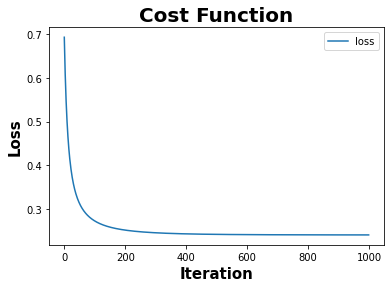

TN, FP, FN, TP: 7706 352 615 996
Accuracy = 0.8999896576688385
F1 = 0.673200405542413
F0.5 = 0.711123804083964
F2 = 0.6391170431211498
Gmean = 0.768922855019635
Balanced Accu. = 0.7872831191737002
Accuracy = 0.925
F1 = 0.6606334841628959
F0.5 = 0.641476274165202
F2 = 0.6809701492537314
Gmean = 0.8135327864155352
Balanced Accu. = 0.8235967012503325
8058 942 9000
################################################## 7th CV ##################################################
8058 1611 9669


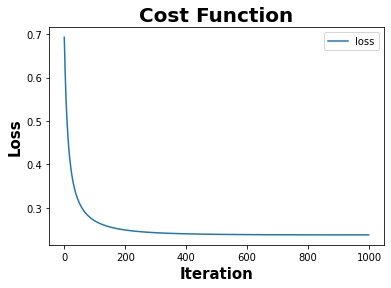

TN, FP, FN, TP: 7708 350 602 1009
Accuracy = 0.9015410073430551
F1 = 0.6794612794612794
F0.5 = 0.7159074783595856
F2 = 0.6465462001794182
Gmean = 0.7740250825514989
Balanced Accu. = 0.7914419804647219
Accuracy = 0.918
F1 = 0.5980392156862745
F0.5 = 0.6087824351297405
F2 = 0.5876685934489403
Gmean = 0.7458459937159362
Balanced Accu. = 0.7692471401968609
8058 942 9000
################################################## 8th CV ##################################################
8058 1611 9669


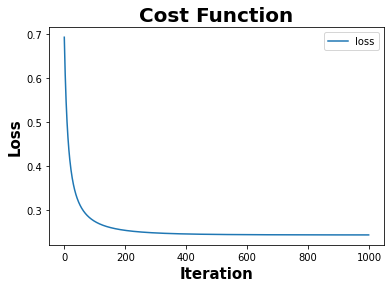

TN, FP, FN, TP: 7699 359 638 973
Accuracy = 0.8968869583204054
F1 = 0.6612300373768264
F0.5 = 0.7011096699812653
F2 = 0.6256430041152263
Gmean = 0.7596476142167645
Balanced Accu. = 0.7797103448785874
Accuracy = 0.931
F1 = 0.6666666666666666
F0.5 = 0.6725146198830408
F2 = 0.6609195402298851
Gmean = 0.7955583000503046
Balanced Accu. = 0.8101356743814845
8058 942 9000
################################################## 9th CV ##################################################
8058 1611 9669


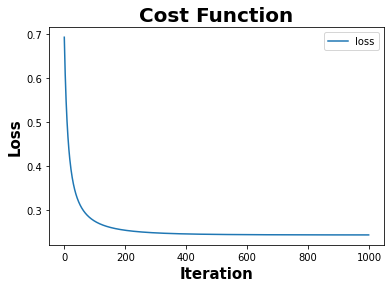

TN, FP, FN, TP: 7711 347 628 983
Accuracy = 0.8991622711759231
F1 = 0.6684801088065284
F0.5 = 0.7091328812581158
F2 = 0.6322356573192693
Gmean = 0.764136084599279
Balanced Accu. = 0.7835586088382505
Accuracy = 0.919
F1 = 0.6267281105990783
F0.5 = 0.6148282097649186
F2 = 0.6390977443609023
Gmean = 0.7847170144479048
Balanced Accu. = 0.7992285182229317
8058 942 9000
################################################## 10th CV ##################################################
8058 1611 9669


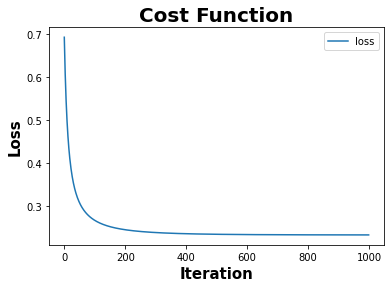

TN, FP, FN, TP: 7716 342 605 1006
Accuracy = 0.9020581239011273
F1 = 0.6799594457587023
F0.5 = 0.7182636013137227
F2 = 0.6455338809034907
Gmean = 0.7732745165083769
Balanced Accu. = 0.7910072828603426
Accuracy = 0.912
F1 = 0.5963302752293578
F0.5 = 0.5834829443447037
F2 = 0.6097560975609756
Gmean = 0.7654066238371473
Balanced Accu. = 0.782708167065709


,Delta,MSE,BCE,BCE_train,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
Acc,0,0,0.921700,0.900121,0,0,0,0,0,0
F1,0,0,0.624295,0.672774,0,0,0,0,0,0
F.5,0,0,0.626473,0.711954,0,0,0,0,0,0
F2,0,0,0.623072,0.637687,0,0,0,0,0,0
Gmean,0,0,0.771094,0.767898,0,0,0,0,0,0
B_Acc,0,0,0.789710,0.786568,0,0,0,0,0,0


In [238]:
# train = train data // test = validation data // 10 cross-validation(train 0.9, validate 0.1, 10 times)
# The average of test results are the validation scores.

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)
n_iter=0

X = df_pca.iloc[:, :2]
y = df_pca.iloc[:, 2]

for train_index, test_index in skf.split(df_pca, df_pca['target']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))
    
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)

    # Resampling
    X_train, y_train = over.fit_resample(X_train, y_train)
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)   
    intercept_r = np.ones((X_train.shape[0],1))
    intercept_t = np.ones((X_test.shape[0],1))
    X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
    X_test_a = np.concatenate((intercept_t,X_test),axis= 1)
    

###################### BCE (with Sigmoid) ##############################       
    theta = np.zeros(X_train_a.shape[1])
    threshold = 0.5
    num_iter = 1000
    cost = []
    lr = 0.2
    yl = y_train.shape[0]
    for i in range(num_iter):
        h = sigmoid(X_train_a,theta)
        cost.append(cost_function(h,y_train))
        gradient = gradient_descent(X_train_a,h,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    
    predicted_r = predict(X_train_a,theta)
    TN = metrics.confusion_matrix(y_train, predicted_r)[0,0]
    FP = metrics.confusion_matrix(y_train, predicted_r)[0,1]
    FN = metrics.confusion_matrix(y_train, predicted_r)[1,0]
    TP = metrics.confusion_matrix(y_train, predicted_r)[1,1]
    bce_train_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_train_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_train_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_train_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_train_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_train_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    
    predicted = predict(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))    
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    


res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'MSE':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'BCE_train':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])

# res['Delta'] = [np.mean(ada_acc), np.mean(ada_f1), np.mean(ada_f5), np.mean(ada_f2), np.mean(ada_gmean), np.mean(ada_bacc)]
# res['MSE'] = [np.mean(mse_acc), np.mean(mse_f1), np.mean(mse_f5), np.mean(mse_f2), np.mean(mse_gmean), np.mean(mse_bacc)]
res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res['BCE_train'] = [np.mean(bce_train_acc), np.mean(bce_train_f1), np.mean(bce_train_f5), np.mean(bce_train_f2), np.mean(bce_train_gmean), np.mean(bce_train_bacc)]
# res['AccAim'] = [np.mean(acc_acc), np.mean(acc_f1), np.mean(acc_f5), np.mean(acc_f2), np.mean(acc_gmean), np.mean(acc_bacc)]
# res['F1Aim'] = [np.mean(f1_acc), np.mean(f1_f1), np.mean(f1_f5), np.mean(f1_f2), np.mean(f1_gmean), np.mean(f1_bacc)]
# res['F.5Aim'] = [np.mean(f05_acc), np.mean(f05_f1), np.mean(f05_f5), np.mean(f05_f2), np.mean(f05_gmean), np.mean(f05_bacc)]
# res['F2Aim'] = [np.mean(f2_acc), np.mean(f2_f1), np.mean(f2_f5), np.mean(f2_f2), np.mean(f2_gmean), np.mean(f2_bacc)]
# res['GAim'] = [np.mean(gmean_acc), np.mean(gmean_f1), np.mean(gmean_f5), np.mean(gmean_f2), np.mean(gmean_gmean), np.mean(gmean_bacc)]
# res['BAim'] = [np.mean(bacc_acc), np.mean(bacc_f1), np.mean(bacc_f5), np.mean(bacc_f2), np.mean(bacc_gmean), np.mean(bacc_bacc)]
D1_02 = res
D1_02

8057 943 9000
################################################## 1th CV ##################################################
4715 943 5658


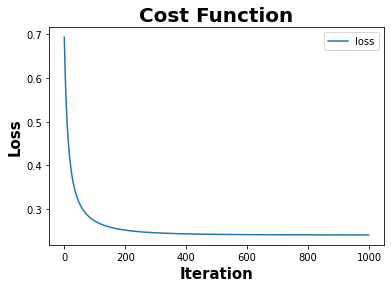

TN, FP, FN, TP: 4516 199 358 585
Accuracy = 0.9015553199010251
F1 = 0.677475390851187
F0.5 = 0.717087521451336
F2 = 0.6420105355575065
Gmean = 0.7708292831265353
Balanced Accu. = 0.7890774125132556
Accuracy = 0.917
F1 = 0.5990338164251208
F0.5 = 0.6007751937984495
F2 = 0.5973025048169556
Gmean = 0.7542376846128214
Balanced Accu. = 0.7751974587912087
8057 943 9000
################################################## 2th CV ##################################################
4715 943 5658


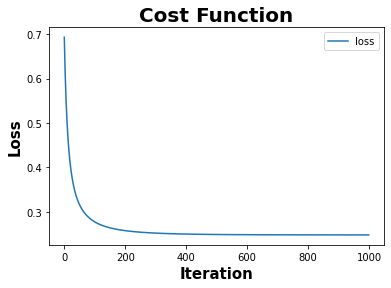

TN, FP, FN, TP: 4503 212 378 565
Accuracy = 0.895722870272181
F1 = 0.6569767441860465
F0.5 = 0.6973586768699086
F2 = 0.6210156078258958
Gmean = 0.7564469958894469
Balanced Accu. = 0.7770943796394485
Accuracy = 0.926
F1 = 0.6542056074766355
F0.5 = 0.6433823529411765
F2 = 0.6653992395437263
Gmean = 0.8018907944064741
Balanced Accu. = 0.8142170329670331
8057 943 9000
################################################## 3th CV ##################################################
4715 943 5658


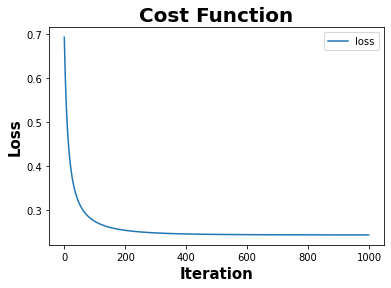

TN, FP, FN, TP: 4518 197 355 588
Accuracy = 0.9024390243902439
F1 = 0.6805555555555556
F0.5 = 0.7200587803085966
F2 = 0.6451612903225806
Gmean = 0.7729743476534453
Balanced Accu. = 0.790880169671262
Accuracy = 0.918
F1 = 0.6019417475728155
F0.5 = 0.60546875
F2 = 0.5984555984555985
Gmean = 0.7546786303883496
Balanced Accu. = 0.7757554945054945
8058 942 9000
################################################## 4th CV ##################################################
4710 942 5652


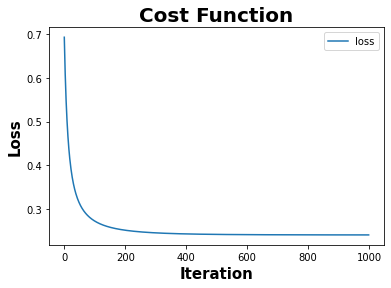

TN, FP, FN, TP: 4506 204 345 597
Accuracy = 0.9028662420382165
F1 = 0.685025817555938
F0.5 = 0.7199710564399421
F2 = 0.6533158240315168
Gmean = 0.7786581871115698
Balanced Accu. = 0.7952229299363057
Accuracy = 0.912
F1 = 0.5463917525773195
F0.5 = 0.5748373101952278
F2 = 0.5206286836935167
Gmean = 0.696030626204808
Balanced Accu. = 0.732269220537377
8058 942 9000
################################################## 5th CV ##################################################
4710 942 5652


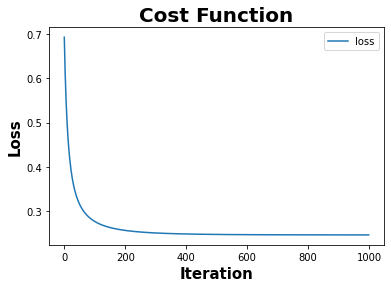

TN, FP, FN, TP: 4493 217 370 572
Accuracy = 0.8961429582448691
F1 = 0.660889659156557
F0.5 = 0.6979014153245485
F2 = 0.6276058810621022
Gmean = 0.7610800161664831
Balanced Accu. = 0.7805732484076433
Accuracy = 0.936
F1 = 0.6701030927835051
F0.5 = 0.7049891540130152
F2 = 0.6385068762278978
Gmean = 0.7761748897192563
Balanced Accu. = 0.7961159882947593
8058 942 9000
################################################## 6th CV ##################################################
4710 942 5652


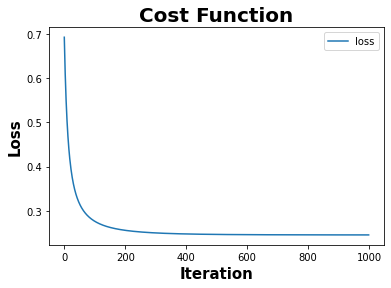

TN, FP, FN, TP: 4508 202 368 574
Accuracy = 0.8991507430997877
F1 = 0.6682188591385332
F0.5 = 0.7093425605536332
F2 = 0.6316021126760564
Gmean = 0.7636810162073175
Balanced Accu. = 0.7832271762208067
Accuracy = 0.924
F1 = 0.6545454545454545
F0.5 = 0.6371681415929203
F2 = 0.6728971962616822
Gmean = 0.8079414295303072
Balanced Accu. = 0.8188347964884277
8058 942 9000
################################################## 7th CV ##################################################
4710 942 5652


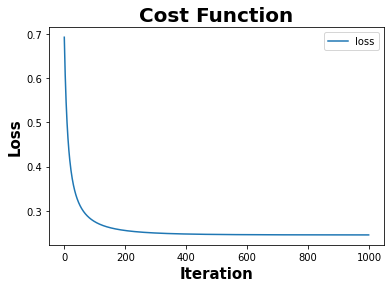

TN, FP, FN, TP: 4515 195 363 579
Accuracy = 0.9012738853503185
F1 = 0.6748251748251748
F0.5 = 0.7169390787518574
F2 = 0.6373844121532364
Gmean = 0.7675952069418822
Balanced Accu. = 0.786624203821656
Accuracy = 0.919
F1 = 0.5970149253731343
F0.5 = 0.6134969325153374
F2 = 0.5813953488372093
Gmean = 0.7405698718121835
Balanced Accu. = 0.7656025538707103
8058 942 9000
################################################## 8th CV ##################################################
4710 942 5652


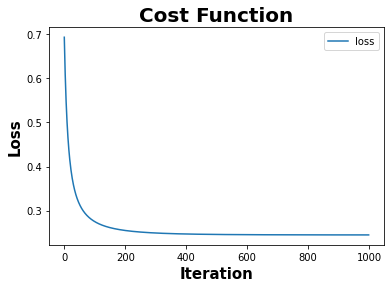

TN, FP, FN, TP: 4511 199 368 574
Accuracy = 0.8996815286624203
F1 = 0.6693877551020408
F0.5 = 0.7114526524541398
F2 = 0.6320193789914116
Gmean = 0.763935082535236
Balanced Accu. = 0.7835456475583864
Accuracy = 0.933
F1 = 0.6731707317073171
F0.5 = 0.6831683168316832
F2 = 0.6634615384615384
Gmean = 0.7964806867949469
Balanced Accu. = 0.8112529928172386
8058 942 9000
################################################## 9th CV ##################################################
4710 942 5652


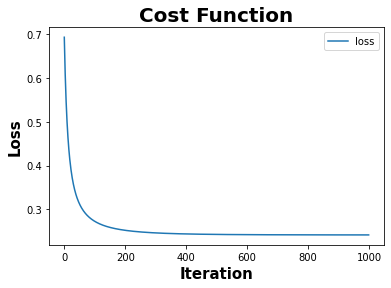

TN, FP, FN, TP: 4507 203 354 588
Accuracy = 0.9014508138711961
F1 = 0.6785920369301789
F0.5 = 0.7160253287871409
F2 = 0.6448782627769248
Gmean = 0.7728523594258
Balanced Accu. = 0.790552016985138
Accuracy = 0.916
F1 = 0.6146788990825688
F0.5 = 0.6014362657091562
F2 = 0.6285178236397748
Gmean = 0.7780098210973064
Balanced Accu. = 0.7933492950252727
8058 942 9000
################################################## 10th CV ##################################################
4710 942 5652


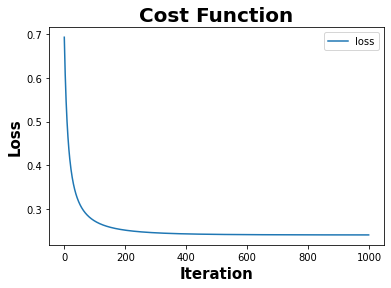

TN, FP, FN, TP: 4505 205 364 578
Accuracy = 0.8993276716206653
F1 = 0.6701449275362319
F0.5 = 0.7093765341188022
F2 = 0.6350252691716106
Gmean = 0.7660822711368346
Balanced Accu. = 0.785031847133758
Accuracy = 0.916
F1 = 0.6074766355140186
F0.5 = 0.6007393715341959
F2 = 0.6143667296786389
Gmean = 0.7672118306460524
Balanced Accu. = 0.7849428039372174


,Delta,MSE,BCE,BCE_train,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
Acc,0,0,0.921700,0.899961,0,0,0,0,0,0
F1,0,0,0.621856,0.672209,0,0,0,0,0,0
F.5,0,0,0.626546,0.711551,0,0,0,0,0,0
F2,0,0,0.618093,0.637002,0,0,0,0,0,0
Gmean,0,0,0.767323,0.767413,0,0,0,0,0,0
B_Acc,0,0,0.786754,0.786183,0,0,0,0,0,0


In [239]:
bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []
bce_train_acc = []
bce_train_f1 = []
bce_train_f5 = []
bce_train_f2 = []
bce_train_gmean = []
bce_train_bacc = []
# train = train data // test = validation data // 10 cross-validation(train 0.9, validate 0.1, 10 times)
# The average of test results are the validation scores.

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)
n_iter=0

X = df_pca.iloc[:, :2]
y = df_pca.iloc[:, 2]

for train_index, test_index in skf.split(df_pca, df_pca['target']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))
    
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)

    # Resampling
    X_train, y_train = under.fit_resample(X_train, y_train)
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)   
    intercept_r = np.ones((X_train.shape[0],1))
    intercept_t = np.ones((X_test.shape[0],1))
    X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
    X_test_a = np.concatenate((intercept_t,X_test),axis= 1)
    
###################### BCE (with Sigmoid) ##############################       
    theta = np.zeros(X_train_a.shape[1])
    threshold = 0.5
    num_iter = 1000
    cost = []
    lr = 0.2
    yl = y_train.shape[0]
    for i in range(num_iter):
        h = sigmoid(X_train_a,theta)
        cost.append(cost_function(h,y_train))
        gradient = gradient_descent(X_train_a,h,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    
    predicted_r = predict(X_train_a,theta)
    TN = metrics.confusion_matrix(y_train, predicted_r)[0,0]
    FP = metrics.confusion_matrix(y_train, predicted_r)[0,1]
    FN = metrics.confusion_matrix(y_train, predicted_r)[1,0]
    TP = metrics.confusion_matrix(y_train, predicted_r)[1,1]
    bce_train_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_train_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_train_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_train_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_train_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_train_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    
    predicted = predict(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))    
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    


res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'MSE':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'BCE_train':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])

# res['Delta'] = [np.mean(ada_acc), np.mean(ada_f1), np.mean(ada_f5), np.mean(ada_f2), np.mean(ada_gmean), np.mean(ada_bacc)]
# res['MSE'] = [np.mean(mse_acc), np.mean(mse_f1), np.mean(mse_f5), np.mean(mse_f2), np.mean(mse_gmean), np.mean(mse_bacc)]
res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res['BCE_train'] = [np.mean(bce_train_acc), np.mean(bce_train_f1), np.mean(bce_train_f5), np.mean(bce_train_f2), np.mean(bce_train_gmean), np.mean(bce_train_bacc)]
# res['AccAim'] = [np.mean(acc_acc), np.mean(acc_f1), np.mean(acc_f5), np.mean(acc_f2), np.mean(acc_gmean), np.mean(acc_bacc)]
# res['F1Aim'] = [np.mean(f1_acc), np.mean(f1_f1), np.mean(f1_f5), np.mean(f1_f2), np.mean(f1_gmean), np.mean(f1_bacc)]
# res['F.5Aim'] = [np.mean(f05_acc), np.mean(f05_f1), np.mean(f05_f5), np.mean(f05_f2), np.mean(f05_gmean), np.mean(f05_bacc)]
# res['F2Aim'] = [np.mean(f2_acc), np.mean(f2_f1), np.mean(f2_f5), np.mean(f2_f2), np.mean(f2_gmean), np.mean(f2_bacc)]
# res['GAim'] = [np.mean(gmean_acc), np.mean(gmean_f1), np.mean(gmean_f5), np.mean(gmean_f2), np.mean(gmean_gmean), np.mean(gmean_bacc)]
# res['BAim'] = [np.mean(bacc_acc), np.mean(bacc_f1), np.mean(bacc_f5), np.mean(bacc_f2), np.mean(bacc_gmean), np.mean(bacc_bacc)]
D1_U_02 = res
D1_U_02

In [240]:
print('+'*20)
print(D1_10['BCE'])
print(D1_U_10['BCE'])
print('+'*20)
print(D1_09['BCE'])
print(D1_U_09['BCE'])
print('+'*20)
print(D1_08['BCE'])
print(D1_U_08['BCE'])
print('+'*20)
print(D1_07['BCE'])
print(D1_U_07['BCE'])
print('+'*20)
print(D1_06['BCE'])
print(D1_U_06['BCE'])
print('+'*20)
print(D1_05['BCE'])
print(D1_U_05['BCE'])
print('+'*20)
print(D1_04['BCE'])
print(D1_U_04['BCE'])
print('+'*20)
print(D1_03['BCE'])
print(D1_U_03['BCE'])
print('+'*20)
print(D1_02['BCE'])
print(D1_U_02['BCE'])

++++++++++++++++++++
Acc      0.856900
F1       0.566957
F.5      0.464815
F2       0.726713
Gmean    0.873290
B_Acc    0.873694
Name: BCE, dtype: float64
Acc      0.857100
F1       0.568744
F.5      0.465964
F2       0.729776
Gmean    0.875484
B_Acc    0.875911
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.865900
F1       0.580999
F.5      0.481192
F2       0.733117
Gmean    0.875541
B_Acc    0.875768
Name: BCE, dtype: float64
Acc      0.864800
F1       0.579003
F.5      0.478985
F2       0.731860
Gmean    0.874921
B_Acc    0.875153
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.873900
F1       0.592797
F.5      0.496453
F2       0.735698
Gmean    0.874996
B_Acc    0.875179
Name: BCE, dtype: float64
Acc      0.873200
F1       0.591117
F.5      0.494687
F2       0.734305
Gmean    0.874202
B_Acc    0.874349
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.881400
F1       0.601010
F.5      0.510523
F2       0.730738
Gmean    0.868783
B_Acc    0.869252
Name

# 2. Creditcard Fraud Detection 2023(29d / 298531)

In [241]:
# class '0' = normal, class '1' = anomaly
card_df = pd.read_csv('creditcard_2023.csv')
card_df.shape

(568630, 31)

In [242]:
# 결측치 확인
card_df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [243]:
card_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [244]:
card_df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [245]:
# Amount values largely varies.

# # Normalization
# card_df.iloc[:,:-1] = (card_df.iloc[:,:-1] - card_df.iloc[:,:-1].min())/(card_df.iloc[:,:-1].max() - card_df.iloc[:,:-1].min())

# Standardization
card_df.iloc[:,:-1] = (card_df.iloc[:,:-1] - card_df.iloc[:,:-1].mean())/card_df.iloc[:,:-1].std()

card_df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.732046,-0.260648,-0.469648,2.496264,-0.083724,0.129681,0.732898,0.519013,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858446,0
1,-1.732040,0.985099,-0.356045,0.558056,-0.429654,0.277140,0.428604,0.406466,-0.133118,0.347452,...,-0.194936,-0.605760,0.079469,-0.577394,0.190090,0.296502,-0.248052,-0.064512,-0.796369,0
2,-1.732034,-0.260271,-0.949384,1.728536,-0.457986,0.074062,1.419480,0.743510,-0.095576,-0.261296,...,-0.005020,0.702906,0.945045,-1.154665,-0.605563,-0.312894,-0.300258,-0.244718,-1.377010,0
3,-1.732028,-0.152152,-0.508958,1.746839,-1.090177,0.249486,1.143311,0.518268,-0.065130,-0.205697,...,-0.146927,-0.038212,-0.214048,-1.893129,1.003962,-0.515950,-0.165316,0.048424,-0.962118,0
4,-1.732022,-0.206819,-0.165280,1.527051,-0.448292,0.106125,0.530548,0.658849,-0.212660,1.049920,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071125,0.023712,0.419117,0.323284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,1.732022,-0.833437,0.061886,-0.899793,0.904226,-1.002400,0.481453,-0.370393,0.189693,-0.938152,...,0.167503,0.419731,1.288248,-0.900860,0.560661,-0.006018,3.308965,0.081564,-1.105230,1
568626,1.732028,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483893,...,0.031874,0.388161,-0.154257,-0.846451,-0.153443,1.961396,-1.528640,1.704305,-1.067766,1
568627,1.732034,-0.311997,-0.004095,0.137525,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140787,0.536522,-0.211100,-0.448908,0.540073,-0.755835,-0.487539,-0.268741,1.666400,1
568628,1.732040,0.636870,-0.516969,-0.300888,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893526,...,-0.060380,-0.195609,-0.175487,-0.554643,-0.099669,-1.434930,-0.159269,-0.076251,-0.271853,1


In [246]:
card_df['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [247]:
# Data is too balanced!!! We intentionally make it imbalanced.
df_0 = card_df[card_df['Class']==0]
df_1 = card_df[card_df['Class']==1]
print(len(df_0), len(df_1))

284315 284315


In [248]:
N = round(len(df_0)*0.05)
df_1_samp = df_1.sample(n=N, random_state = 100)
df_1_samp

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
506274,1.352179,-0.006870,-0.167584,-0.426402,0.286979,3.061201,-1.574602,0.044742,-0.428210,0.154000,...,-0.386374,-0.470302,-1.743519,-1.185101,-1.558751,-1.397993,-0.012629,0.450646,1.114237,1
387527,0.628771,-1.505330,0.343708,-1.307073,1.727683,-0.524436,-2.021618,-2.304781,-0.078004,-1.148383,...,-0.427704,-1.212065,-12.554995,0.951595,-5.763942,0.191730,3.949965,-1.475321,-0.071128,1
365951,0.497330,-0.503065,0.153162,-0.422713,-0.354370,-0.419048,-0.107715,0.314880,-0.203583,0.279555,...,0.037084,-0.209385,0.549983,0.396777,-1.430279,-2.486924,-0.617871,0.560011,-1.321357,1
525848,1.471424,-1.021538,-1.187974,-0.746483,-0.029644,0.009252,-0.507414,0.471536,-0.015704,-0.207999,...,0.018479,0.766577,0.123668,0.268437,0.800809,0.413684,-0.034178,-0.097596,1.445303,1
481288,1.199964,-0.509792,0.194382,-0.386280,-0.611187,0.135320,0.440036,-0.240672,-0.615084,0.251804,...,-0.095779,0.402399,-0.251087,-0.566821,0.409498,-1.473372,-0.251349,-0.044765,-0.010947,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491209,1.260403,-1.088031,0.682312,-0.917454,0.643955,-0.652642,-0.555339,-0.667876,0.288458,-0.764149,...,0.528281,0.386071,0.095967,1.123651,-0.015030,0.636864,-1.803348,1.164825,-0.080206,1
372018,0.534290,-2.281503,2.701140,-2.214454,1.222394,-2.728423,-2.561828,-2.136703,4.308934,-1.151728,...,0.558177,-1.432524,-0.994643,0.310707,2.660860,-0.516013,1.909650,0.968061,0.731649,1
343903,0.363014,-0.267325,0.352643,-0.836113,0.475835,-0.673489,-0.723249,-0.492036,0.200382,-0.714633,...,0.283521,0.720715,0.230679,0.010768,-0.039101,1.150750,0.024092,-0.461128,0.646750,1
452083,1.022047,-2.174120,2.531664,-2.126482,1.202406,-2.566989,-2.477827,-2.045211,3.892891,-1.178189,...,0.554093,-1.297113,-0.862695,0.284146,2.371527,-0.520116,2.028946,1.024555,0.740116,1


In [249]:
df_card = concath(df_0, df_1_samp)
df_card

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.732046,-0.260648,-0.469648,2.496264,-0.083724,0.129681,0.732898,0.519013,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858446,0
1,-1.732040,0.985099,-0.356045,0.558056,-0.429654,0.277140,0.428604,0.406466,-0.133118,0.347452,...,-0.194936,-0.605760,0.079469,-0.577394,0.190090,0.296502,-0.248052,-0.064512,-0.796369,0
2,-1.732034,-0.260271,-0.949384,1.728536,-0.457986,0.074062,1.419480,0.743510,-0.095576,-0.261296,...,-0.005020,0.702906,0.945045,-1.154665,-0.605563,-0.312894,-0.300258,-0.244718,-1.377010,0
3,-1.732028,-0.152152,-0.508958,1.746839,-1.090177,0.249486,1.143311,0.518268,-0.065130,-0.205697,...,-0.146927,-0.038212,-0.214048,-1.893129,1.003962,-0.515950,-0.165316,0.048424,-0.962118,0
4,-1.732022,-0.206819,-0.165280,1.527051,-0.448292,0.106125,0.530548,0.658849,-0.212660,1.049920,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071125,0.023712,0.419117,0.323284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491209,1.260403,-1.088031,0.682312,-0.917454,0.643955,-0.652642,-0.555339,-0.667876,0.288458,-0.764149,...,0.528281,0.386071,0.095967,1.123651,-0.015030,0.636864,-1.803348,1.164825,-0.080206,1
372018,0.534290,-2.281503,2.701140,-2.214454,1.222394,-2.728423,-2.561828,-2.136703,4.308934,-1.151728,...,0.558177,-1.432524,-0.994643,0.310707,2.660860,-0.516013,1.909650,0.968061,0.731649,1
343903,0.363014,-0.267325,0.352643,-0.836113,0.475835,-0.673489,-0.723249,-0.492036,0.200382,-0.714633,...,0.283521,0.720715,0.230679,0.010768,-0.039101,1.150750,0.024092,-0.461128,0.646750,1
452083,1.022047,-2.174120,2.531664,-2.126482,1.202406,-2.566989,-2.477827,-2.045211,3.892891,-1.178189,...,0.554093,-1.297113,-0.862695,0.284146,2.371527,-0.520116,2.028946,1.024555,0.740116,1


In [250]:
df_card.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [251]:
df_card = df_card.drop('id', axis=1)
df_card

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496264,-0.083724,0.129681,0.732898,0.519013,-0.130006,0.727159,0.637734,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858446,0
1,0.985099,-0.356045,0.558056,-0.429654,0.277140,0.428604,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605760,0.079469,-0.577394,0.190090,0.296502,-0.248052,-0.064512,-0.796369,0
2,-0.260271,-0.949384,1.728536,-0.457986,0.074062,1.419480,0.743510,-0.095576,-0.261296,0.690707,...,-0.005020,0.702906,0.945045,-1.154665,-0.605563,-0.312894,-0.300258,-0.244718,-1.377010,0
3,-0.152152,-0.508958,1.746839,-1.090177,0.249486,1.143311,0.518268,-0.065130,-0.205697,0.575230,...,-0.146927,-0.038212,-0.214048,-1.893129,1.003962,-0.515950,-0.165316,0.048424,-0.962118,0
4,-0.206819,-0.165280,1.527051,-0.448292,0.106125,0.530548,0.658849,-0.212660,1.049920,0.968045,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071125,0.023712,0.419117,0.323284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491209,-1.088031,0.682312,-0.917454,0.643955,-0.652642,-0.555339,-0.667876,0.288458,-0.764149,-0.665831,...,0.528281,0.386071,0.095967,1.123651,-0.015030,0.636864,-1.803348,1.164825,-0.080206,1
372018,-2.281503,2.701140,-2.214454,1.222394,-2.728423,-2.561828,-2.136703,4.308934,-1.151728,-1.283930,...,0.558177,-1.432524,-0.994643,0.310707,2.660860,-0.516013,1.909650,0.968061,0.731649,1
343903,-0.267325,0.352643,-0.836113,0.475835,-0.673489,-0.723249,-0.492036,0.200382,-0.714633,-0.660779,...,0.283521,0.720715,0.230679,0.010768,-0.039101,1.150750,0.024092,-0.461128,0.646750,1
452083,-2.174120,2.531664,-2.126482,1.202406,-2.566989,-2.477827,-2.045211,3.892891,-1.178189,-1.315622,...,0.554093,-1.297113,-0.862695,0.284146,2.371527,-0.520116,2.028946,1.024555,0.740116,1


In [252]:
df_card['Class'].value_counts()

0    284315
1     14216
Name: Class, dtype: int64

In [283]:
ada_acc = []
ada_f1 = []
ada_f5 = []
ada_f2 = []
ada_gmean = []
ada_bacc = []

mse_acc = []
mse_f1 = []
mse_f5 = []
mse_f2 = []
mse_gmean = []
mse_bacc = []

bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []
bce_train_acc = []
bce_train_f1 = []
bce_train_f5 = []
bce_train_f2 = []
bce_train_gmean = []
bce_train_bacc = []

acc_acc = []
acc_f1 = []
acc_f5 = []
acc_f2 = []
acc_gmean = []
acc_bacc = []

f1_acc = []
f1_f1 = []
f1_f5 = []
f1_f2 = []
f1_gmean = []
f1_bacc = []

f05_acc = []
f05_f1 = []
f05_f5 = []
f05_f2 = []
f05_gmean = []
f05_bacc = []

f2_acc = []
f2_f1 = []
f2_f5 = []
f2_f2 = []
f2_gmean = []
f2_bacc = []

gmean_acc = []
gmean_f1 = []
gmean_f5 = []
gmean_f2 = []
gmean_gmean = []
gmean_bacc = []

bacc_acc = []
bacc_f1 = []
bacc_f5 = []
bacc_f2 = []
bacc_gmean = []
bacc_bacc = []

a = 0.1
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=a, random_state=0)
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=a, random_state=0)

255883 12794 268677
################################################## 1th CV ##################################################
255883 25588 281471


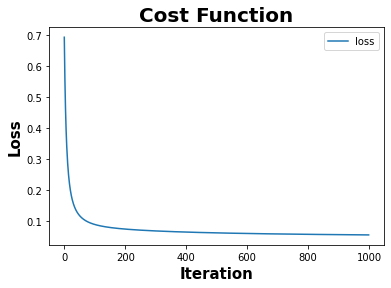

TN, FP, FN, TP: 255756 127 4319 21269
Accuracy = 0.9842044118221771
F1 = 0.9053720415460582
F0.5 = 0.9565807937250388
F2 = 0.8593674241199857
Gmean = 0.9114808805216125
Balanced Accu. = 0.9153568107881853
Accuracy = 0.9917598981710993
F1 = 0.9058913542463657
F0.5 = 0.9563812600969306
F2 = 0.8604651162790697
Gmean = 0.9123572867798663
Balanced Accu. = 0.9161743626760759
255883 12795 268678
################################################## 2th CV ##################################################
255883 25588 281471


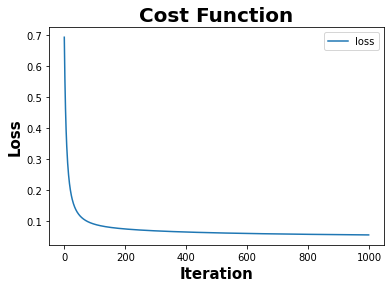

TN, FP, FN, TP: 255755 128 4351 21237
Accuracy = 0.9840871706143794
F1 = 0.9046067343939684
F0.5 = 0.9562081262156904
F2 = 0.8582894832561411
Gmean = 0.9107931634156715
Balanced Accu. = 0.9147295636639945
Accuracy = 0.9913576524972365
F1 = 0.901300688599847
F0.5 = 0.9510737929920879
F2 = 0.8564781154573214
Gmean = 0.9102506855037626
Balanced Accu. = 0.9142330459341093
255883 12795 268678
################################################## 3th CV ##################################################
255883 25588 281471


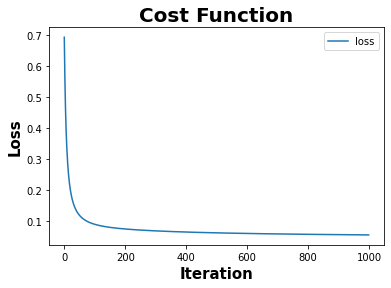

TN, FP, FN, TP: 255756 127 4325 21263
Accuracy = 0.9841830952389411
F1 = 0.9052322363659585
F0.5 = 0.9565174362111779
F2 = 0.8591666531977824
Gmean = 0.9113523067515328
Balanced Accu. = 0.9152395683307835
Accuracy = 0.9914916423810002
F1 = 0.9026819923371647
F0.5 = 0.9535373158491178
F2 = 0.8569765750036373
Gmean = 0.9103147470623967
Balanced Accu. = 0.914303389209292
255883 12795 268678
################################################## 4th CV ##################################################
255883 25588 281471


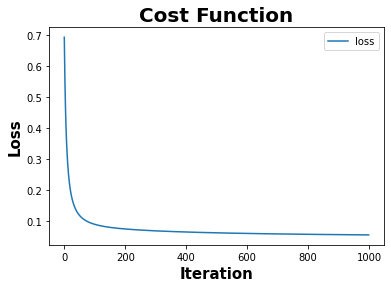

TN, FP, FN, TP: 255768 115 4346 21242
Accuracy = 0.9841511203640873
F1 = 0.9049739056342528
F0.5 = 0.9567089428550839
F2 = 0.8585470741821533
Gmean = 0.9109235250259144
Balanced Accu. = 0.9148526679464446
Accuracy = 0.991022677787827
F1 = 0.8976317799847212
F0.5 = 0.9462071186986633
F2 = 0.8538003197209708
Gmean = 0.9089789080560804
Balanced Accu. = 0.9130543505508855
255883 12795 268678
################################################## 5th CV ##################################################
255883 25588 281471


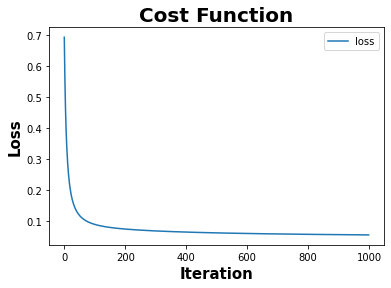

TN, FP, FN, TP: 255760 123 4348 21240
Accuracy = 0.9841155927253606
F1 = 0.9047730612766501
F0.5 = 0.9564121037463977
F2 = 0.8584246049387706
Gmean = 0.9108663953514998
Balanced Accu. = 0.9147979549829321
Accuracy = 0.9913241550262956
F1 = 0.9005758157389635
F0.5 = 0.9525743056683451
F2 = 0.8539603960396038
Gmean = 0.9083807853557277
Balanced Accu. = 0.912544064789869
255884 12794 268678
################################################## 6th CV ##################################################
255884 25588 281472


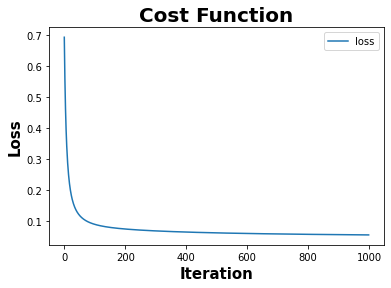

TN, FP, FN, TP: 255764 120 4258 21330
Accuracy = 0.9844460550250114
F1 = 0.9069263148943407
F0.5 = 0.957463999712716
F2 = 0.8614561961842296
Gmean = 0.9127995113180344
Balanced Accu. = 0.9165624548144637
Accuracy = 0.9910896727297089
F1 = 0.8980061349693251
F0.5 = 0.9495621148232241
F2 = 0.8517602560372418
Gmean = 0.9072230036655439
Balanced Accu. = 0.9114802259434234
255884 12794 268678
################################################## 7th CV ##################################################
255884 25588 281472


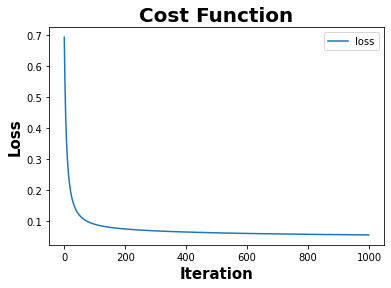

TN, FP, FN, TP: 255763 121 4282 21306
Accuracy = 0.9843572362437472
F1 = 0.9063490375412102
F0.5 = 0.9571772570442783
F2 = 0.860646797922103
Gmean = 0.9122840533655249
Balanced Accu. = 0.9160915309744453
Accuracy = 0.9912236626134727
F1 = 0.9001524390243902
F0.5 = 0.9478330658105939
F2 = 0.8570391872278664
Gmean = 0.9109922865903995
Balanced Accu. = 0.9148908817216366
255884 12794 268678
################################################## 8th CV ##################################################
255884 25588 281472


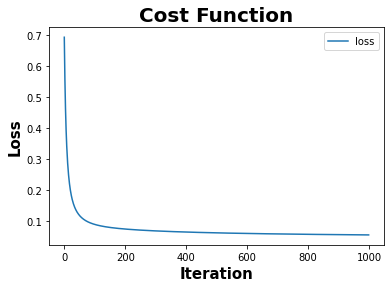

TN, FP, FN, TP: 255766 118 4333 21255
Accuracy = 0.9841867041837199
F1 = 0.9052192244628522
F0.5 = 0.9567428880086424
F2 = 0.8589614063447161
Gmean = 0.9111968796480864
Balanced Accu. = 0.9151008321177618
Accuracy = 0.9913576524972365
F1 = 0.9014514896867838
F0.5 = 0.9506928778601353
F2 = 0.8570598489250435
Gmean = 0.9106866453682525
Balanced Accu. = 0.9146271964681092
255884 12794 268678
################################################## 9th CV ##################################################
255884 25588 281472


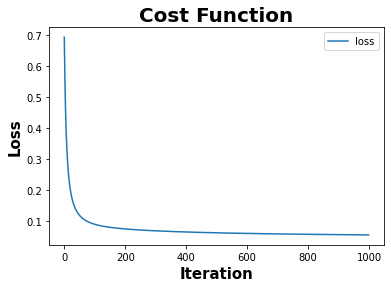

TN, FP, FN, TP: 255748 136 4380 21208
Accuracy = 0.983955775352433
F1 = 0.9037756754453251
F0.5 = 0.9556252478281244
F2 = 0.8572629672746087
Gmean = 0.9101568539359529
Balanced Accu. = 0.9141472606807162
Accuracy = 0.9917596221485278
F1 = 0.9059633027522935
F0.5 = 0.9559535333978701
F2 = 0.8609415867480383
Gmean = 0.9127264304123336
Balanced Accu. = 0.9165083887306109
255884 12794 268678
################################################## 10th CV ##################################################
255884 25588 281472


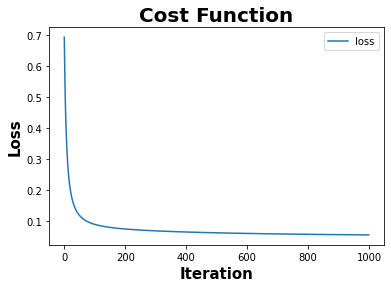

TN, FP, FN, TP: 255757 127 4388 21200
Accuracy = 0.9839593281036835
F1 = 0.9037621229883832
F0.5 = 0.9558505266195355
F2 = 0.8570573824173868
Gmean = 0.9100011862682673
Balanced Accu. = 0.914008523497879
Accuracy = 0.9921280943288782
F1 = 0.9106803496769289
F0.5 = 0.9571748162352189
F2 = 0.8684935479193852
Gmean = 0.9176870009354994
Balanced Accu. = 0.9210442425788574


,Delta,MSE,BCE,BCE_train,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
Acc,0,0,0.991451,0.984165,0,0,0,0,0,0
F1,0,0,0.902434,0.905099,0,0,0,0,0,0
F.5,0,0,0.952099,0.956529,0,0,0,0,0,0
F2,0,0,0.857697,0.858918,0,0,0,0,0,0
Gmean,0,0,0.910960,0.911185,0,0,0,0,0,0
B_Acc,0,0,0.914886,0.915089,0,0,0,0,0,0


In [284]:
# train = train data // test = validation data // 10 cross-validation(train 0.9, validate 0.1, 10 times)
# The average of test results are the validation scores.

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)
n_iter=0

X = df_card.iloc[:, :-1]
y = df_card.iloc[:, -1]


for train_index, test_index in skf.split(df_card, df_card['Class']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))
    
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)

    # Resampling
    X_train, y_train = over.fit_resample(X_train, y_train)
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)   
    intercept_r = np.ones((X_train.shape[0],1))
    intercept_t = np.ones((X_test.shape[0],1))
    X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
    X_test_a = np.concatenate((intercept_t,X_test),axis= 1)
    
###################### BCE (with Sigmoid) ##############################       
    theta = np.zeros(X_train_a.shape[1])
    threshold = 0.5
    num_iter = 1000
    cost = []
    lr = 0.05
    yl = y_train.shape[0]
    for i in range(num_iter):
        h = sigmoid(X_train_a,theta)
        cost.append(cost_function(h,y_train))
        gradient = gradient_descent(X_train_a,h,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    
    predicted_r = predict(X_train_a,theta)
    TN = metrics.confusion_matrix(y_train, predicted_r)[0,0]
    FP = metrics.confusion_matrix(y_train, predicted_r)[0,1]
    FN = metrics.confusion_matrix(y_train, predicted_r)[1,0]
    TP = metrics.confusion_matrix(y_train, predicted_r)[1,1]
    bce_train_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_train_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_train_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_train_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_train_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_train_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    
    predicted = predict(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))    
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    

res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'MSE':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'BCE_train':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])


res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res['BCE_train'] = [np.mean(bce_train_acc), np.mean(bce_train_f1), np.mean(bce_train_f5), np.mean(bce_train_f2), np.mean(bce_train_gmean), np.mean(bce_train_bacc)]
D2_01 = res
D2_01

255883 12794 268677
################################################## 1th CV ##################################################
127940 12794 140734


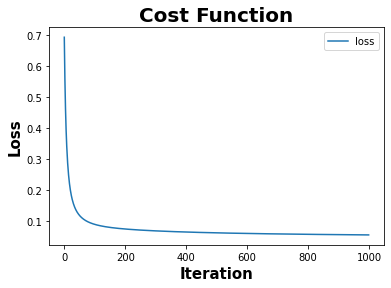

TN, FP, FN, TP: 127879 61 2172 10622
Accuracy = 0.9841331874316086
F1 = 0.9048856327469438
F0.5 = 0.956488852069301
F2 = 0.8585654472267575
Gmean = 0.9109539386015587
Balanced Accu. = 0.914878067844302
Accuracy = 0.9917598981710993
F1 = 0.9058913542463657
F0.5 = 0.9563812600969306
F2 = 0.8604651162790697
Gmean = 0.9123572867798663
Balanced Accu. = 0.9161743626760759
255883 12795 268678
################################################## 2th CV ##################################################
127950 12795 140745


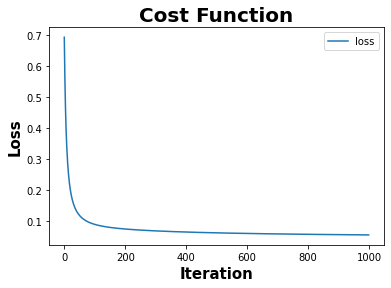

TN, FP, FN, TP: 127890 60 2170 10625
Accuracy = 0.9841557426551565
F1 = 0.9050255536626917
F0.5 = 0.9566039434590798
F2 = 0.8587246423664431
Gmean = 0.9110505461794938
Balanced Accu. = 0.9149667838999609
Accuracy = 0.9913576524972365
F1 = 0.901300688599847
F0.5 = 0.9510737929920879
F2 = 0.8564781154573214
Gmean = 0.9102506855037626
Balanced Accu. = 0.9142330459341093
255883 12795 268678
################################################## 3th CV ##################################################
127950 12795 140745


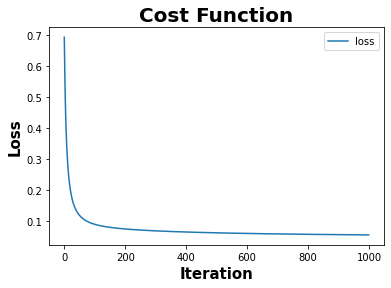

TN, FP, FN, TP: 127894 56 2167 10628
Accuracy = 0.9842054779921134
F1 = 0.9053196473444355
F0.5 = 0.9569429687922062
F2 = 0.8589809905599378
Gmean = 0.9111934053109213
Balanced Accu. = 0.9150996483001173
Accuracy = 0.9914581449100592
F1 = 0.9022614028363357
F0.5 = 0.9533452130244614
F2 = 0.8563736903376018
Gmean = 0.9099282835565218
Balanced Accu. = 0.9139515243254075
255883 12795 268678
################################################## 4th CV ##################################################
127950 12795 140745


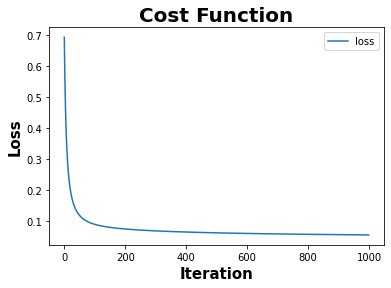

TN, FP, FN, TP: 127896 54 2169 10626
Accuracy = 0.9842054779921134
F1 = 0.9053035143769969
F0.5 = 0.9570386382058903
F2 = 0.8588748787584869
Gmean = 0.9111147900056326
Balanced Accu. = 0.9150293083235639
Accuracy = 0.991056175258768
F1 = 0.8979747802827666
F0.5 = 0.9468170829975826
F2 = 0.8539244186046512
Gmean = 0.9089949054321704
Balanced Accu. = 0.9130719363696811
255883 12795 268678
################################################## 5th CV ##################################################
127950 12795 140745


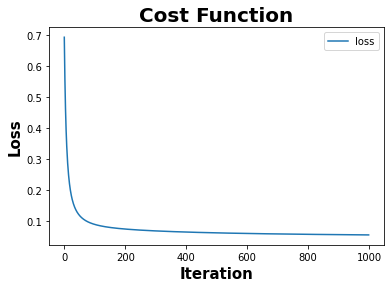

TN, FP, FN, TP: 127888 62 2165 10630
Accuracy = 0.9841770577995665
F1 = 0.9051815898156427
F0.5 = 0.9565718193762035
F2 = 0.8590315490043962
Gmean = 0.9112577603922771
Balanced Accu. = 0.9151543571707699
Accuracy = 0.9912906575553546
F1 = 0.9001536098310292
F0.5 = 0.9523809523809524
F2 = 0.8533566331731469
Gmean = 0.907993498710388
Balanced Accu. = 0.9121921999059845
255884 12794 268678
################################################## 6th CV ##################################################
127940 12794 140734


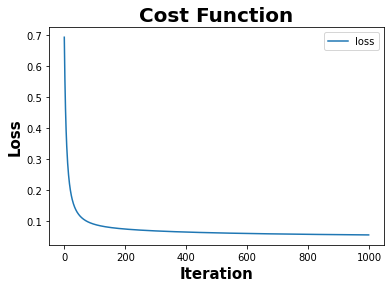

TN, FP, FN, TP: 127873 67 2166 10628
Accuracy = 0.9841331874316086
F1 = 0.9049342245306313
F0.5 = 0.9562025407564687
F2 = 0.8588838066299235
Gmean = 0.9111898084771374
Balanced Accu. = 0.9150891042676255
Accuracy = 0.9910896727297089
F1 = 0.8980842911877395
F0.5 = 0.9491415613864593
F2 = 0.852239674229203
Gmean = 0.9075943218541518
Balanced Accu. = 0.9118142569463088
255884 12794 268678
################################################## 7th CV ##################################################
127940 12794 140734


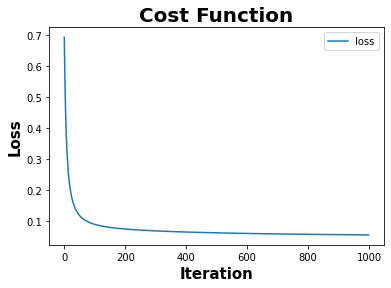

TN, FP, FN, TP: 127887 53 2169 10625
Accuracy = 0.9842113490698765
F1 = 0.9053340149965917
F0.5 = 0.9571037365329875
F2 = 0.8588773563552882
Gmean = 0.911111068928369
Balanced Accu. = 0.9150265749570111
Accuracy = 0.9913241550262956
F1 = 0.9011827546737886
F0.5 = 0.9496622708266322
F2 = 0.8574125163351243
Gmean = 0.9110403841742661
Balanced Accu. = 0.9149436410336551
255884 12794 268678
################################################## 8th CV ##################################################
127940 12794 140734


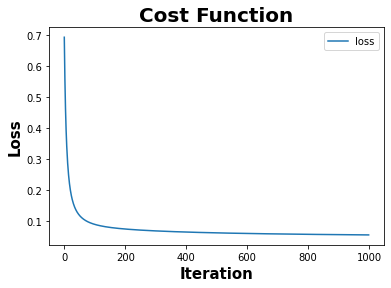

TN, FP, FN, TP: 127875 65 2172 10622
Accuracy = 0.984104765017693
F1 = 0.9047314850304502
F0.5 = 0.956213316049116
F2 = 0.8585099332395778
Gmean = 0.9109396913668716
Balanced Accu. = 0.9148624355166484
Accuracy = 0.9913576524972365
F1 = 0.9015267175572519
F0.5 = 0.9502735757965883
F2 = 0.8575370316584374
Gmean = 0.9110564161379493
Balanced Accu. = 0.9149612274709946
255884 12794 268678
################################################## 9th CV ##################################################
127940 12794 140734


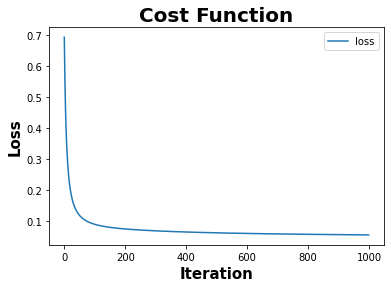

TN, FP, FN, TP: 127879 61 2173 10621
Accuracy = 0.9841260818281297
F1 = 0.9048389844948032
F0.5 = 0.9564677064947228
F2 = 0.8584984965566297
Gmean = 0.9109110570641893
Balanced Accu. = 0.9148389870251681
Accuracy = 0.9917596221485278
F1 = 0.9059633027522935
F0.5 = 0.9559535333978701
F2 = 0.8609415867480383
Gmean = 0.9127264304123336
Balanced Accu. = 0.9165083887306109
255884 12794 268678
################################################## 10th CV ##################################################
127940 12794 140734


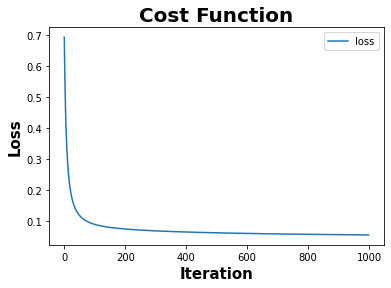

TN, FP, FN, TP: 127870 70 2187 10607
Accuracy = 0.9839626529481149
F1 = 0.903838779770781
F0.5 = 0.9555511513098628
F2 = 0.8574361793284077
Gmean = 0.9102784694923192
Balanced Accu. = 0.914256682820072
Accuracy = 0.9921280943288782
F1 = 0.9106803496769289
F0.5 = 0.9571748162352189
F2 = 0.8684935479193852
Gmean = 0.9176870009354994
Balanced Accu. = 0.9210442425788574


,Delta,MSE,BCE,BCE_train,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
Acc,0,0,0.991458,0.984141,0,0,0,0,0,0
F1,0,0,0.902502,0.904939,0,0,0,0,0,0
F.5,0,0,0.952220,0.956518,0,0,0,0,0,0
F2,0,0,0.857722,0.858638,0,0,0,0,0,0
Gmean,0,0,0.910963,0.911000,0,0,0,0,0,0
B_Acc,0,0,0.914889,0.914920,0,0,0,0,0,0


In [285]:
bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []
bce_train_acc = []
bce_train_f1 = []
bce_train_f5 = []
bce_train_f2 = []
bce_train_gmean = []
bce_train_bacc = []

# train = train data // test = validation data // 10 cross-validation(train 0.9, validate 0.1, 10 times)
# The average of test results are the validation scores.

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)
n_iter=0

X = df_card.iloc[:, :-1]
y = df_card.iloc[:, -1]


for train_index, test_index in skf.split(df_card, df_card['Class']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))
    
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)

    # Resampling
    X_train, y_train = under.fit_resample(X_train, y_train)
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)   
    intercept_r = np.ones((X_train.shape[0],1))
    intercept_t = np.ones((X_test.shape[0],1))
    X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
    X_test_a = np.concatenate((intercept_t,X_test),axis= 1)
    
###################### BCE (with Sigmoid) ##############################       
    theta = np.zeros(X_train_a.shape[1])
    threshold = 0.5
    num_iter = 1000
    cost = []
    lr = 0.05
    yl = y_train.shape[0]
    for i in range(num_iter):
        h = sigmoid(X_train_a,theta)
        cost.append(cost_function(h,y_train))
        gradient = gradient_descent(X_train_a,h,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    
    predicted_r = predict(X_train_a,theta)
    TN = metrics.confusion_matrix(y_train, predicted_r)[0,0]
    FP = metrics.confusion_matrix(y_train, predicted_r)[0,1]
    FN = metrics.confusion_matrix(y_train, predicted_r)[1,0]
    TP = metrics.confusion_matrix(y_train, predicted_r)[1,1]
    bce_train_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_train_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_train_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_train_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_train_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_train_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    
    predicted = predict(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))    
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    

res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'MSE':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'BCE_train':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])


res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res['BCE_train'] = [np.mean(bce_train_acc), np.mean(bce_train_f1), np.mean(bce_train_f5), np.mean(bce_train_f2), np.mean(bce_train_gmean), np.mean(bce_train_bacc)]
D2_U_01 = res
D2_U_01

In [286]:
len(bce_f1)

10

In [287]:
print('+'*20)
print(D2_10['BCE'])
print(D2_U_10['BCE'])
print('+'*20)
print(D2_09['BCE'])
print(D2_U_09['BCE'])
print('+'*20)
print(D2_08['BCE'])
print(D2_U_08['BCE'])
print('+'*20)
print(D2_07['BCE'])
print(D2_U_07['BCE'])
print('+'*20)
print(D2_06['BCE'])
print(D2_U_06['BCE'])
print('+'*20)
print(D2_05['BCE'])
print(D2_U_05['BCE'])
print('+'*20)
print(D2_04['BCE'])
print(D2_U_04['BCE'])
print('+'*20)
print(D2_03['BCE'])
print(D2_U_03['BCE'])
print('+'*20)
print(D2_02['BCE'])
print(D2_U_02['BCE'])
print('+'*20)
print(D2_01['BCE'])
print(D2_U_01['BCE'])

++++++++++++++++++++
Acc      0.984172
F1       0.847029
F.5      0.808534
F2       0.889395
Gmean    0.953136
B_Acc    0.953733
Name: BCE, dtype: float64
Acc      0.984169
F1       0.847080
F.5      0.808394
F2       0.889689
Gmean    0.953377
B_Acc    0.953965
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.984990
F1       0.853513
F.5      0.818971
F2       0.891126
Gmean    0.952575
B_Acc    0.953226
Name: BCE, dtype: float64
Acc      0.984980
F1       0.853449
F.5      0.818815
F2       0.891177
Gmean    0.952639
B_Acc    0.953288
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.985693
F1       0.859124
F.5      0.828331
F2       0.892324
Gmean    0.951850
B_Acc    0.952560
Name: BCE, dtype: float64
Acc      0.985720
F1       0.859333
F.5      0.828755
F2       0.892291
Gmean    0.951759
B_Acc    0.952474
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.986380
F1       0.864520
F.5      0.838152
F2       0.892628
Gmean    0.950451
B_Acc    0.951250
Name

# 3. Breast Cancer Data (30d / 569)

In [288]:
# class 'B' = Benign, class 'M' = Malignant
cancer_df = pd.read_csv('breast_cancer.csv')
cancer_df.shape

(569, 32)

In [289]:
cancer_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [290]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [291]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [292]:
# M/Malignant = 0, B/Benign = 1
y_encoded, y_class = pd.factorize(cancer_df['diagnosis'])
print(y_class)
y_encoded

Index(['M', 'B'], dtype='object')


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [293]:
# But I want [B/Benign = 0(Major), M/Malignant = 1(minor)]
y_encoded = (y_encoded+1)%2
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [294]:
cancer_df['label'] = y_encoded
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [295]:
cancer_df = cancer_df.drop('id', axis=1)
cancer_df = cancer_df.drop('diagnosis', axis=1)
cancer_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [296]:
# Amount values largely varies.

# # Normalization
# card_df.iloc[:,:-1] = (card_df.iloc[:,:-1] - card_df.iloc[:,:-1].min())/(card_df.iloc[:,:-1].max() - card_df.iloc[:,:-1].min())

# Standardization
cancer_df.iloc[:,:-1] = (cancer_df.iloc[:,:-1] - cancer_df.iloc[:,:-1].mean())/cancer_df.iloc[:,:-1].std()

cancer_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,1
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,1
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,1
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,1
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,1
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,1


In [297]:
cancer_df['label'].value_counts()

0    357
1    212
Name: label, dtype: int64

In [298]:
# Data is too balanced!!! We intentionally make it imbalanced.
df_0 = cancer_df[cancer_df['label']==0]
df_1 = cancer_df[cancer_df['label']==1]
print(len(df_0), len(df_1))

357 212


In [299]:
N = round(len(df_0)*0.1)
df_1_samp = df_1.sample(n=N, random_state = 100)
df_1_samp

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
219,1.533097,3.064460,1.482818,1.614345,-0.864631,0.163957,0.322388,0.449731,-1.399339,-1.369279,...,3.210535,2.170633,2.803894,0.369273,0.987914,0.610243,0.728618,-0.303481,-0.457654,1
45,1.283384,-0.392847,1.305856,1.196630,0.962713,1.216733,1.362280,1.339615,0.347926,-0.326840,...,-0.708923,1.289747,1.205600,1.556182,1.619046,2.216001,1.874173,1.451885,0.437632,1
408,1.096100,0.318610,1.063047,0.957083,0.514765,0.493423,0.392634,1.013350,0.657983,-0.298513,...,-0.043477,0.917752,0.822712,0.693374,0.757834,0.277588,1.259559,0.257396,0.060028,1
156,1.008133,0.337210,1.046586,0.877518,1.076478,1.176970,1.213007,1.455585,0.581381,-0.161126,...,-0.092288,0.763001,0.740163,0.413071,0.607202,0.412759,0.561273,-0.707570,-0.363530,1
213,0.934354,1.457870,0.927239,0.832905,0.301456,0.194253,0.995997,0.439423,-1.837067,-0.586034,...,0.389306,0.391006,0.246624,-0.353383,-0.476463,0.038881,-0.071597,-2.097638,-0.872908,1
100,-0.146789,1.323019,-0.161284,-0.205133,-0.105252,-0.364135,-0.031978,-0.103836,-0.739099,-0.578952,...,1.560751,0.039842,0.045520,-0.257029,-0.381126,0.214316,0.057716,-0.403695,-0.552332,1
372,2.055224,-0.974102,2.030166,2.077526,0.265905,0.892947,1.309595,1.973589,0.588676,-0.137048,...,-0.624319,1.334387,1.149396,-0.576750,0.188990,0.624144,1.247389,-0.276002,0.150276,1
212,3.967796,-0.190570,3.972634,5.240230,1.268455,0.894841,2.901420,2.849813,-0.596837,-1.069012,...,-1.172620,2.417638,2.842534,-0.795736,-0.652519,0.229655,0.682979,-2.024902,-1.588804,1
433,1.331624,0.623187,1.305856,1.293244,0.386780,0.654369,0.885610,0.992733,0.479244,-0.209282,...,0.854630,1.132021,1.268829,0.290438,0.584956,0.570459,0.854888,0.171729,-0.044616,1
365,1.791323,0.579012,1.721511,1.813257,-0.345580,0.165850,0.115287,0.745586,-0.706269,-1.023688,...,0.112715,1.605200,1.579706,0.014515,-0.105920,-0.009531,0.941603,-0.471582,-0.918862,1


In [300]:
cancer_df = concath(df_0, df_1_samp)
cancer_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
19,-0.166653,-1.146154,-0.185565,-0.251735,0.101657,-0.436466,-0.277965,-0.028584,0.267676,-0.727669,...,-1.044086,-0.225019,-0.297499,0.509425,-0.489175,-0.159083,0.215933,0.123238,-0.628739,0
20,-0.297184,-0.832276,-0.260877,-0.383301,0.792066,0.429044,-0.540886,-0.459223,0.566790,0.752425,...,-0.843964,-0.332451,-0.439238,-0.051181,0.148312,-0.398748,-0.635551,0.457824,-0.117147,0
21,-1.311926,-1.592558,-1.301661,-1.082620,0.429441,-0.746429,-0.743094,-0.725698,0.012334,0.885562,...,-1.629809,-1.253810,-0.993547,0.001375,-0.886413,-0.879660,-0.796202,-0.728583,-0.344152,0
37,-0.311372,-0.202195,-0.385162,-0.372503,-0.464322,-1.262592,-0.792517,-0.507415,-1.257077,-0.590283,...,-0.466499,-0.678556,-0.587827,-1.548613,-1.322484,-1.073022,-0.980890,-1.476957,-1.232240,0
46,-1.683090,-0.569549,-1.656820,-1.287215,-0.736646,-0.850381,-0.914695,-1.108221,-0.155461,0.316186,...,-0.604795,-1.488019,-1.121235,-0.116877,-0.753576,-0.974903,-1.353462,0.330132,-0.545688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.117112,1.918224,0.195933,0.011113,1.247125,1.044426,0.942058,0.637089,1.792428,1.129176,...,1.863374,0.501116,0.109978,1.551802,2.564154,2.063094,0.860973,2.129139,2.776892,1
489,0.727206,0.211659,0.622700,0.576024,-1.520911,-0.629033,-0.656165,-0.666166,0.125414,-1.352283,...,0.143628,0.596347,0.357275,-1.378241,0.239836,-0.117381,-0.414350,2.871047,-0.427202,1
451,1.550123,1.327669,1.470472,1.523414,0.486324,-0.106622,0.962128,1.074943,-0.542121,-1.258804,...,0.859511,0.968343,0.949171,0.894842,-0.443413,0.601615,0.486728,-0.982351,-1.275426,1
223,0.460467,0.223284,0.437507,0.302377,0.436552,0.304075,0.324896,0.404632,0.450062,0.032915,...,0.750502,0.554684,0.364300,0.999955,1.231342,0.601136,0.506505,1.765458,1.243223,1


In [301]:
cancer_df['label'].value_counts()

0    357
1     36
Name: label, dtype: int64

In [327]:
ada_acc = []
ada_f1 = []
ada_f5 = []
ada_f2 = []
ada_gmean = []
ada_bacc = []

mse_acc = []
mse_f1 = []
mse_f5 = []
mse_f2 = []
mse_gmean = []
mse_bacc = []

bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []
bce_train_acc = []
bce_train_f1 = []
bce_train_f5 = []
bce_train_f2 = []
bce_train_gmean = []
bce_train_bacc = []

acc_acc = []
acc_f1 = []
acc_f5 = []
acc_f2 = []
acc_gmean = []
acc_bacc = []

f1_acc = []
f1_f1 = []
f1_f5 = []
f1_f2 = []
f1_gmean = []
f1_bacc = []

f05_acc = []
f05_f1 = []
f05_f5 = []
f05_f2 = []
f05_gmean = []
f05_bacc = []

f2_acc = []
f2_f1 = []
f2_f5 = []
f2_f2 = []
f2_gmean = []
f2_bacc = []

gmean_acc = []
gmean_f1 = []
gmean_f5 = []
gmean_f2 = []
gmean_gmean = []
gmean_bacc = []

bacc_acc = []
bacc_f1 = []
bacc_f5 = []
bacc_f2 = []
bacc_gmean = []
bacc_bacc = []

a = 0.2
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=a, random_state=0)
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=a, random_state=0)

321 32 353
################################################## 1th CV ##################################################
321 64 385


/tmp/33503.1.gpu/ipykernel_2702929/4102710891.py:85: RuntimeWarning: divide by zero encountered in log
  loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()
/tmp/33503.1.gpu/ipykernel_2702929/4102710891.py:85: RuntimeWarning: invalid value encountered in multiply
  loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()


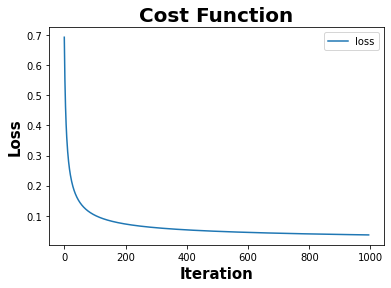

TN, FP, FN, TP: 321 0 3 61
Accuracy = 0.9922077922077922
F1 = 0.976
F0.5 = 0.9902597402597403
F2 = 0.9621451104100947
Gmean = 0.9762812094883317
Balanced Accu. = 0.9765625
Accuracy = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
321 32 353
################################################## 2th CV ##################################################
321 64 385


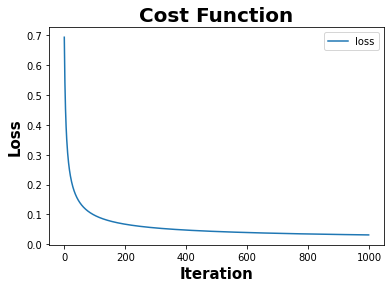

TN, FP, FN, TP: 321 0 3 61
Accuracy = 0.9922077922077922
F1 = 0.976
F0.5 = 0.9902597402597403
F2 = 0.9621451104100947
Gmean = 0.9762812094883317
Balanced Accu. = 0.9765625
Accuracy = 0.975
F1 = 0.8571428571428571
F0.5 = 0.9375
F2 = 0.7894736842105263
Gmean = 0.8660254037844386
Balanced Accu. = 0.875
321 32 353
################################################## 3th CV ##################################################
321 64 385


/tmp/33503.1.gpu/ipykernel_2702929/4102710891.py:85: RuntimeWarning: divide by zero encountered in log
  loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()
/tmp/33503.1.gpu/ipykernel_2702929/4102710891.py:85: RuntimeWarning: invalid value encountered in multiply
  loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()


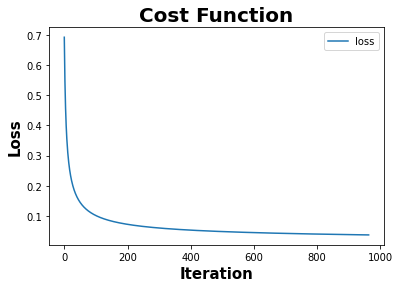

TN, FP, FN, TP: 320 1 4 60
Accuracy = 0.987012987012987
F1 = 0.96
F0.5 = 0.9740259740259741
F2 = 0.946372239747634
Gmean = 0.9667364890456636
Balanced Accu. = 0.9671923676012462
Accuracy = 0.975
F1 = 0.8888888888888888
F0.5 = 0.8333333333333334
F2 = 0.9523809523809523
Gmean = 0.9860132971832694
Balanced Accu. = 0.9861111111111112
321 33 354
################################################## 4th CV ##################################################
321 64 385


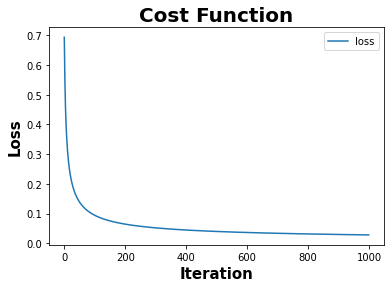

TN, FP, FN, TP: 321 0 1 63
Accuracy = 0.9974025974025974
F1 = 0.9921259842519685
F0.5 = 0.9968354430379747
F2 = 0.987460815047022
Gmean = 0.9921567416492215
Balanced Accu. = 0.9921875
Accuracy = 0.9743589743589743
F1 = 0.8
F0.5 = 0.9090909090909091
F2 = 0.7142857142857143
Gmean = 0.816496580927726
Balanced Accu. = 0.8333333333333333
321 33 354
################################################## 5th CV ##################################################
321 64 385


/tmp/33503.1.gpu/ipykernel_2702929/4102710891.py:85: RuntimeWarning: divide by zero encountered in log
  loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()
/tmp/33503.1.gpu/ipykernel_2702929/4102710891.py:85: RuntimeWarning: invalid value encountered in multiply
  loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()


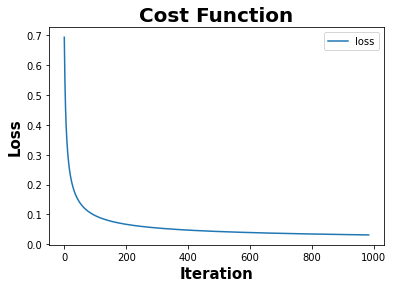

TN, FP, FN, TP: 321 0 2 62
Accuracy = 0.9948051948051948
F1 = 0.9841269841269841
F0.5 = 0.9935897435897436
F2 = 0.9748427672955975
Gmean = 0.9842509842514764
Balanced Accu. = 0.984375
Accuracy = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
321 33 354
################################################## 6th CV ##################################################
321 64 385


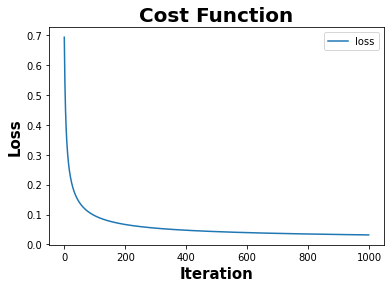

TN, FP, FN, TP: 321 0 2 62
Accuracy = 0.9948051948051948
F1 = 0.9841269841269841
F0.5 = 0.9935897435897436
F2 = 0.9748427672955975
Gmean = 0.9842509842514764
Balanced Accu. = 0.984375
Accuracy = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
321 33 354
################################################## 7th CV ##################################################
321 64 385


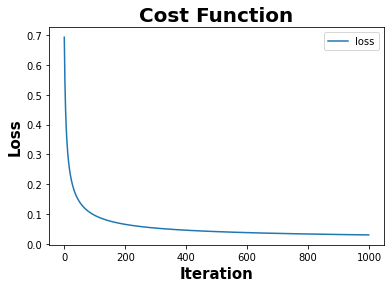

TN, FP, FN, TP: 321 0 2 62
Accuracy = 0.9948051948051948
F1 = 0.9841269841269841
F0.5 = 0.9935897435897436
F2 = 0.9748427672955975
Gmean = 0.9842509842514764
Balanced Accu. = 0.984375
Accuracy = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
322 32 354
################################################## 8th CV ##################################################
322 64 386


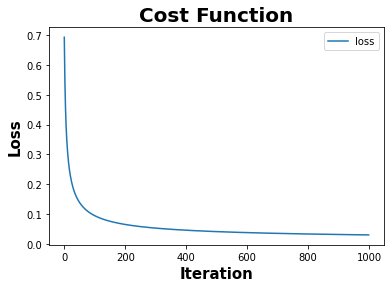

TN, FP, FN, TP: 322 0 3 61
Accuracy = 0.9922279792746114
F1 = 0.976
F0.5 = 0.9902597402597403
F2 = 0.9621451104100947
Gmean = 0.9762812094883317
Balanced Accu. = 0.9765625
Accuracy = 0.9743589743589743
F1 = 0.8888888888888888
F0.5 = 0.8333333333333334
F2 = 0.9523809523809523
Gmean = 0.9856107606091623
Balanced Accu. = 0.9857142857142858
322 32 354
################################################## 9th CV ##################################################
322 64 386


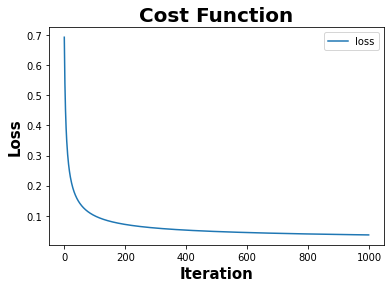

TN, FP, FN, TP: 322 0 4 60
Accuracy = 0.9896373056994818
F1 = 0.967741935483871
F0.5 = 0.986842105263158
F2 = 0.9493670886075949
Gmean = 0.9682458365518543
Balanced Accu. = 0.96875
Accuracy = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
322 32 354
################################################## 10th CV ##################################################
322 64 386


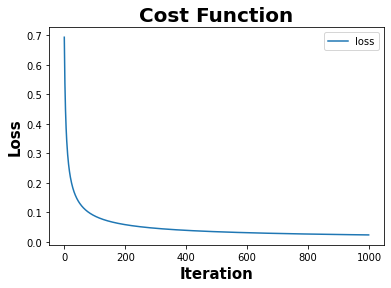

TN, FP, FN, TP: 322 0 2 62
Accuracy = 0.9948186528497409
F1 = 0.9841269841269841
F0.5 = 0.9935897435897436
F2 = 0.9748427672955975
Gmean = 0.9842509842514764
Balanced Accu. = 0.984375
Accuracy = 0.9487179487179487
F1 = 0.6666666666666666
F0.5 = 0.8333333333333334
F2 = 0.5555555555555556
Gmean = 0.7071067811865476
Balanced Accu. = 0.75


,Delta,MSE,BCE,BCE_train,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
Acc,0,0,0.984744,0.992993,0,0,0,0,0,0
F1,0,0,0.910159,0.978438,0,0,0,0,0,0
F.5,0,0,0.934659,0.990284,0,0,0,0,0,0
F2,0,0,0.896408,0.966901,0,0,0,0,0,0
Gmean,0,0,0.936125,0.979299,0,0,0,0,0,0
B_Acc,0,0,0.943016,0.979532,0,0,0,0,0,0


In [328]:
# train = train data // test = validation data // 10 cross-validation(train 0.9, validate 0.1, 10 times)
# The average of test results are the validation scores.

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)
n_iter=0

X = cancer_df.iloc[:, :-1]
y = cancer_df.iloc[:, -1]


for train_index, test_index in skf.split(cancer_df, cancer_df['label']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))
    
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)

    # Resampling
    X_train, y_train = over.fit_resample(X_train, y_train)
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)   
    intercept_r = np.ones((X_train.shape[0],1))
    intercept_t = np.ones((X_test.shape[0],1))
    X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
    X_test_a = np.concatenate((intercept_t,X_test),axis= 1)
    
###################### BCE (with Sigmoid) ##############################       
    theta = np.zeros(X_train_a.shape[1])
    threshold = 0.5
    num_iter = 1000
    cost = []
    lr = 0.05
    yl = y_train.shape[0]
    for i in range(num_iter):
        h = sigmoid(X_train_a,theta)
        cost.append(cost_function(h,y_train))
        gradient = gradient_descent(X_train_a,h,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    
    predicted_r = predict(X_train_a,theta)
    TN = metrics.confusion_matrix(y_train, predicted_r)[0,0]
    FP = metrics.confusion_matrix(y_train, predicted_r)[0,1]
    FN = metrics.confusion_matrix(y_train, predicted_r)[1,0]
    TP = metrics.confusion_matrix(y_train, predicted_r)[1,1]
    bce_train_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_train_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_train_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_train_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_train_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_train_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    
    predicted = predict(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))    
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    

res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'MSE':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'BCE_train':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])


res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res['BCE_train'] = [np.mean(bce_train_acc), np.mean(bce_train_f1), np.mean(bce_train_f5), np.mean(bce_train_f2), np.mean(bce_train_gmean), np.mean(bce_train_bacc)]
D3_02 = res
D3_02

321 32 353
################################################## 1th CV ##################################################
160 32 192


/tmp/33503.1.gpu/ipykernel_2702929/4102710891.py:85: RuntimeWarning: divide by zero encountered in log
  loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()
/tmp/33503.1.gpu/ipykernel_2702929/4102710891.py:85: RuntimeWarning: invalid value encountered in multiply
  loss = ((-y * np.log(h))-((1-y)* np.log(1-h))).mean()


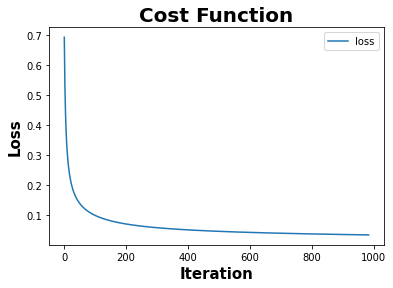

TN, FP, FN, TP: 160 0 1 31
Accuracy = 0.9947916666666666
F1 = 0.9841269841269841
F0.5 = 0.9935897435897436
F2 = 0.9748427672955975
Gmean = 0.9842509842514764
Balanced Accu. = 0.984375
Accuracy = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
321 32 353
################################################## 2th CV ##################################################
160 32 192


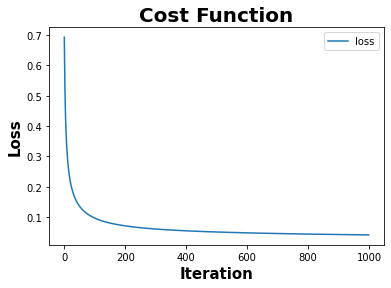

TN, FP, FN, TP: 160 0 2 30
Accuracy = 0.9895833333333334
F1 = 0.967741935483871
F0.5 = 0.986842105263158
F2 = 0.9493670886075949
Gmean = 0.9682458365518543
Balanced Accu. = 0.96875
Accuracy = 0.975
F1 = 0.8571428571428571
F0.5 = 0.9375
F2 = 0.7894736842105263
Gmean = 0.8660254037844386
Balanced Accu. = 0.875
321 32 353
################################################## 3th CV ##################################################
160 32 192


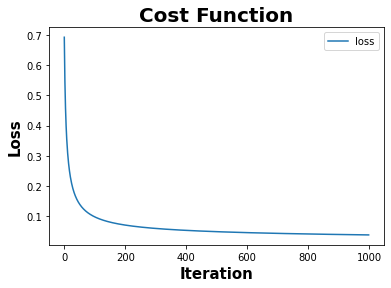

TN, FP, FN, TP: 160 0 1 31
Accuracy = 0.9947916666666666
F1 = 0.9841269841269841
F0.5 = 0.9935897435897436
F2 = 0.9748427672955975
Gmean = 0.9842509842514764
Balanced Accu. = 0.984375
Accuracy = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
321 33 354
################################################## 4th CV ##################################################
165 33 198


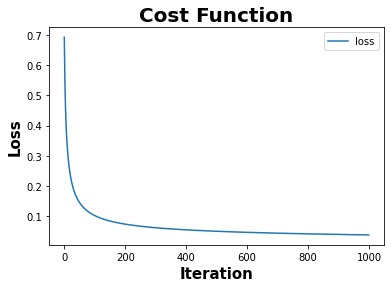

TN, FP, FN, TP: 165 0 1 32
Accuracy = 0.9949494949494949
F1 = 0.9846153846153847
F0.5 = 0.9937888198757763
F2 = 0.9756097560975611
Gmean = 0.9847319278346619
Balanced Accu. = 0.9848484848484849
Accuracy = 0.9743589743589743
F1 = 0.8
F0.5 = 0.9090909090909091
F2 = 0.7142857142857143
Gmean = 0.816496580927726
Balanced Accu. = 0.8333333333333333
321 33 354
################################################## 5th CV ##################################################
165 33 198


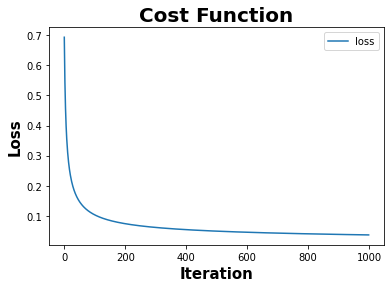

TN, FP, FN, TP: 165 0 1 32
Accuracy = 0.9949494949494949
F1 = 0.9846153846153847
F0.5 = 0.9937888198757763
F2 = 0.9756097560975611
Gmean = 0.9847319278346619
Balanced Accu. = 0.9848484848484849
Accuracy = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
321 33 354
################################################## 6th CV ##################################################
165 33 198


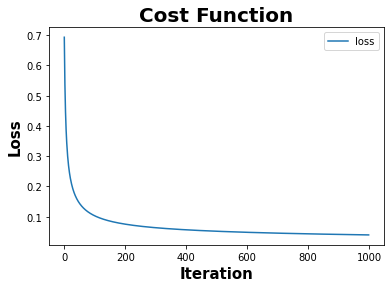

TN, FP, FN, TP: 165 0 2 31
Accuracy = 0.98989898989899
F1 = 0.96875
F0.5 = 0.9872611464968153
F2 = 0.950920245398773
Gmean = 0.9692233691951198
Balanced Accu. = 0.9696969696969697
Accuracy = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
321 33 354
################################################## 7th CV ##################################################
165 33 198


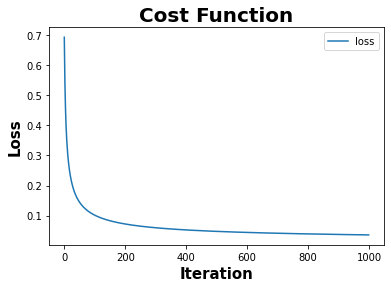

TN, FP, FN, TP: 164 1 1 32
Accuracy = 0.98989898989899
F1 = 0.9696969696969697
F0.5 = 0.9696969696969697
F2 = 0.9696969696969697
Gmean = 0.9817433566698951
Balanced Accu. = 0.9818181818181818
Accuracy = 0.9743589743589743
F1 = 0.8
F0.5 = 0.9090909090909091
F2 = 0.7142857142857143
Gmean = 0.816496580927726
Balanced Accu. = 0.8333333333333333
322 32 354
################################################## 8th CV ##################################################
160 32 192


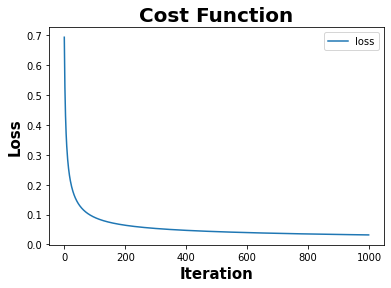

TN, FP, FN, TP: 160 0 1 31
Accuracy = 0.9947916666666666
F1 = 0.9841269841269841
F0.5 = 0.9935897435897436
F2 = 0.9748427672955975
Gmean = 0.9842509842514764
Balanced Accu. = 0.984375
Accuracy = 0.9743589743589743
F1 = 0.8888888888888888
F0.5 = 0.8333333333333334
F2 = 0.9523809523809523
Gmean = 0.9856107606091623
Balanced Accu. = 0.9857142857142858
322 32 354
################################################## 9th CV ##################################################
160 32 192


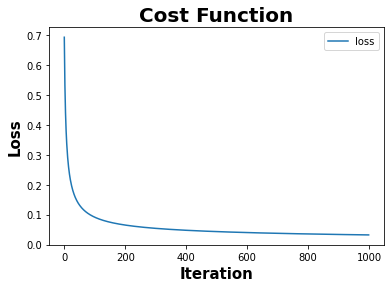

TN, FP, FN, TP: 160 0 1 31
Accuracy = 0.9947916666666666
F1 = 0.9841269841269841
F0.5 = 0.9935897435897436
F2 = 0.9748427672955975
Gmean = 0.9842509842514764
Balanced Accu. = 0.984375
Accuracy = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
322 32 354
################################################## 10th CV ##################################################
160 32 192


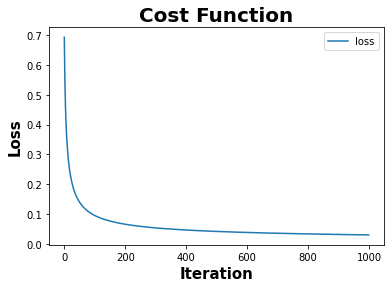

TN, FP, FN, TP: 160 0 1 31
Accuracy = 0.9947916666666666
F1 = 0.9841269841269841
F0.5 = 0.9935897435897436
F2 = 0.9748427672955975
Gmean = 0.9842509842514764
Balanced Accu. = 0.984375
Accuracy = 0.9487179487179487
F1 = 0.6666666666666666
F0.5 = 0.8333333333333334
F2 = 0.5555555555555556
Gmean = 0.7071067811865476
Balanced Accu. = 0.75


,Delta,MSE,BCE,BCE_train,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
Acc,0,0,0.984679,0.993324,0,0,0,0,0,0
F1,0,0,0.901270,0.979605,0,0,0,0,0,0
F.5,0,0,0.942235,0.989933,0,0,0,0,0,0
F2,0,0,0.872598,0.969542,0,0,0,0,0,0
Gmean,0,0,0.919174,0.980993,0,0,0,0,0,0
B_Acc,0,0,0.927738,0.981184,0,0,0,0,0,0


In [329]:
bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []
bce_train_acc = []
bce_train_f1 = []
bce_train_f5 = []
bce_train_f2 = []
bce_train_gmean = []
bce_train_bacc = []

# train = train data // test = validation data // 10 cross-validation(train 0.9, validate 0.1, 10 times)
# The average of test results are the validation scores.

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)
n_iter=0

X = cancer_df.iloc[:, :-1]
y = cancer_df.iloc[:, -1]


for train_index, test_index in skf.split(cancer_df, cancer_df['label']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))
    
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)

    # Resampling
    X_train, y_train = under.fit_resample(X_train, y_train)
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)   
    intercept_r = np.ones((X_train.shape[0],1))
    intercept_t = np.ones((X_test.shape[0],1))
    X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
    X_test_a = np.concatenate((intercept_t,X_test),axis= 1)
    
###################### BCE (with Sigmoid) ##############################       
    theta = np.zeros(X_train_a.shape[1])
    threshold = 0.5
    num_iter = 1000
    cost = []
    lr = 0.05
    yl = y_train.shape[0]
    for i in range(num_iter):
        h = sigmoid(X_train_a,theta)
        cost.append(cost_function(h,y_train))
        gradient = gradient_descent(X_train_a,h,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    
    predicted_r = predict(X_train_a,theta)
    TN = metrics.confusion_matrix(y_train, predicted_r)[0,0]
    FP = metrics.confusion_matrix(y_train, predicted_r)[0,1]
    FN = metrics.confusion_matrix(y_train, predicted_r)[1,0]
    TP = metrics.confusion_matrix(y_train, predicted_r)[1,1]
    bce_train_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_train_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_train_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_train_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_train_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_train_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    
    predicted = predict(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))    
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    

res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'MSE':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'BCE_train':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])


res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res['BCE_train'] = [np.mean(bce_train_acc), np.mean(bce_train_f1), np.mean(bce_train_f5), np.mean(bce_train_f2), np.mean(bce_train_gmean), np.mean(bce_train_bacc)]
D3_U_02 = res
D3_U_02

In [330]:
print('+'*20)
print(D3_10['BCE'])
print(D3_U_10['BCE'])
print('+'*20)
print(D3_09['BCE'])
print(D3_U_09['BCE'])
print('+'*20)
print(D3_08['BCE'])
print(D3_U_08['BCE'])
print('+'*20)
print(D3_07['BCE'])
print(D3_U_07['BCE'])
print('+'*20)
print(D3_06['BCE'])
print(D3_U_06['BCE'])
print('+'*20)
print(D3_05['BCE'])
print(D3_U_05['BCE'])
print('+'*20)
print(D3_04['BCE'])
print(D3_U_04['BCE'])
print('+'*20)
print(D3_03['BCE'])
print(D3_U_03['BCE'])
print('+'*20)
print(D3_02['BCE'])
print(D3_U_02['BCE'])

++++++++++++++++++++
Acc      0.984679
F1       0.915873
F.5      0.907895
F2       0.933532
Gmean    0.965076
B_Acc    0.969405
Name: BCE, dtype: float64
Acc      0.959231
F1       0.822172
F.5      0.771283
F2       0.896900
Gmean    0.960215
B_Acc    0.962302
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.984679
F1       0.915873
F.5      0.907895
F2       0.933532
Gmean    0.965076
B_Acc    0.969405
Name: BCE, dtype: float64
Acc      0.961795
F1       0.832886
F.5      0.785013
F2       0.902415
Gmean    0.961634
B_Acc    0.963690
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.984679
F1       0.915873
F.5      0.907895
F2       0.933532
Gmean    0.965076
B_Acc    0.969405
Name: BCE, dtype: float64
Acc      0.959231
F1       0.818600
F.5      0.778763
F2       0.881363
Gmean    0.948236
B_Acc    0.951190
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.987244
F1       0.930159
F.5      0.928947
F2       0.939782
Gmean    0.966474
B_Acc    0.970794
Name

# 4. Diabetes Prediction Data (8d / 100000)

In [331]:
# class 'B' = Benign, class 'M' = Malignant
diab_df = pd.read_csv('diabetes_prediction_dataset.csv')
diab_df.shape

(100000, 9)

In [332]:
diab_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [333]:
diab_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [334]:
# Female = 0, Male = 1, other = 2
gen_encoded, gen_class = pd.factorize(diab_df['gender'])
print(gen_class)
gen_encoded

Index(['Female', 'Male', 'Other'], dtype='object')


array([0, 0, 1, ..., 1, 0, 0])

In [335]:
# Female = 0, Male = 1, other = 2
pd.Series(gen_encoded).value_counts()

0    58552
1    41430
2       18
dtype: int64

In [336]:
diab_df['gender'] = gen_encoded
diab_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [337]:
# never = 0, Info = 1, current = 2, former=3, ever=4, not current=5
smo_encoded, smo_class = pd.factorize(diab_df['smoking_history'])
print(smo_class)
smo_encoded

Index(['never', 'No Info', 'current', 'former', 'ever', 'not current'], dtype='object')


array([0, 1, 0, ..., 3, 0, 2])

In [338]:
# never = 0, Info = 1, current = 2, former=3, ever=4, not current=5
pd.Series(smo_encoded).value_counts()

1    35816
0    35095
3     9352
2     9286
5     6447
4     4004
dtype: int64

In [339]:
diab_df['smoking_history'] = smo_encoded
diab_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,1,27.32,6.2,90,0
99996,0,2.0,0,0,1,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [340]:
diab_df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,1.306950,27.320767,5.527507,138.058060,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.454501,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,2.000000,29.580000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


In [341]:
# Amount values largely varies.

# # Normalization
# card_df.iloc[:,:-1] = (card_df.iloc[:,:-1] - card_df.iloc[:,:-1].min())/(card_df.iloc[:,:-1].max() - card_df.iloc[:,:-1].min())

# Standardization
diab_df.iloc[:,:-1] = (diab_df.iloc[:,:-1] - diab_df.iloc[:,:-1].mean())/diab_df.iloc[:,:-1].std()

diab_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,-0.841043,1.692695,-0.284438,4.936354,-0.898556,-0.321054,1.001701,0.047704,0
1,-0.841043,0.538004,-0.284438,-0.202577,-0.211035,-0.000116,1.001701,-1.426203,0
2,1.187228,-0.616688,-0.284438,-0.202577,-0.898556,-0.000116,0.161107,0.489876,0
3,-0.841043,-0.261398,-0.284438,-0.202577,0.476486,-0.583229,-0.492688,0.416181,0
4,1.187228,1.515050,3.515669,4.936354,0.476486,-1.081965,-0.679486,0.416181,0
...,...,...,...,...,...,...,...,...,...
99995,-0.841043,1.692695,-0.284438,-0.202577,-0.211035,-0.000116,0.628104,-1.180552,0
99996,-0.841043,-1.771379,-0.284438,-0.202577,-0.211035,-1.499336,0.908301,-0.934901,0
99997,1.187228,1.070938,-0.284438,-0.202577,1.164008,0.076729,0.161107,0.416181,0
99998,-0.841043,-0.794332,-0.284438,-0.202577,-0.898556,1.220355,-1.426681,-0.934901,0


In [342]:
# imbalanced Data, very good
# None = 0, Diabetes = 1
diab_df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [373]:
ada_acc = []
ada_f1 = []
ada_f5 = []
ada_f2 = []
ada_gmean = []
ada_bacc = []

mse_acc = []
mse_f1 = []
mse_f5 = []
mse_f2 = []
mse_gmean = []
mse_bacc = []

bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []
bce_train_acc = []
bce_train_f1 = []
bce_train_f5 = []
bce_train_f2 = []
bce_train_gmean = []
bce_train_bacc = []

acc_acc = []
acc_f1 = []
acc_f5 = []
acc_f2 = []
acc_gmean = []
acc_bacc = []

f1_acc = []
f1_f1 = []
f1_f5 = []
f1_f2 = []
f1_gmean = []
f1_bacc = []

f05_acc = []
f05_f1 = []
f05_f5 = []
f05_f2 = []
f05_gmean = []
f05_bacc = []

f2_acc = []
f2_f1 = []
f2_f5 = []
f2_f2 = []
f2_gmean = []
f2_bacc = []

gmean_acc = []
gmean_f1 = []
gmean_f5 = []
gmean_f2 = []
gmean_gmean = []
gmean_bacc = []

bacc_acc = []
bacc_f1 = []
bacc_f5 = []
bacc_f2 = []
bacc_gmean = []
bacc_bacc = []

a = 0.1
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=a, random_state=0)
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=a, random_state=0)

82350 7650 90000
################################################## 1th CV ##################################################
82350 8235 90585


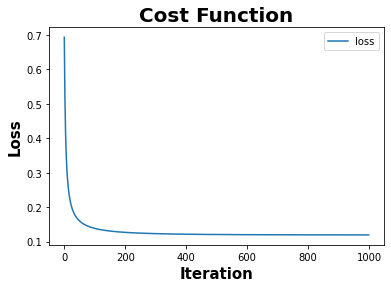

TN, FP, FN, TP: 81600 750 3070 5165
Accuracy = 0.9578296627476955
F1 = 0.7300353356890459
F0.5 = 0.809688038877567
F2 = 0.6646506241153005
Gmean = 0.7883455832364445
Balanced Accu. = 0.8090467516697025
Accuracy = 0.9594
F1 = 0.723055934515689
F0.5 = 0.79963789981895
F2 = 0.6598605577689243
Gmean = 0.7859191540782211
Balanced Accu. = 0.8070652523304404
82350 7650 90000
################################################## 2th CV ##################################################
82350 8235 90585


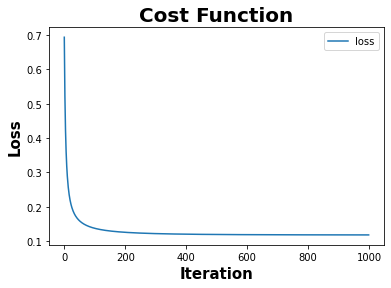

TN, FP, FN, TP: 81598 752 3048 5187
Accuracy = 0.9580504498537286
F1 = 0.7319034852546917
F0.5 = 0.8106967584633177
F2 = 0.6670696262763961
Gmean = 0.7900130722476012
Balanced Accu. = 0.8103703703703704
Accuracy = 0.9584
F1 = 0.7200538358008075
F0.5 = 0.7881555686505599
F2 = 0.6627849355797819
Gmean = 0.7889639785403801
Balanced Accu. = 0.809186756669881
82350 7650 90000
################################################## 3th CV ##################################################
82350 8235 90585


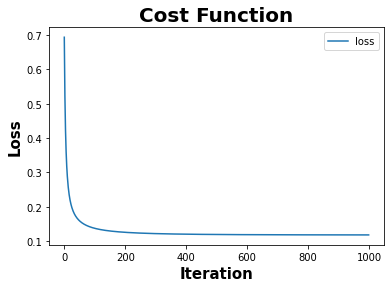

TN, FP, FN, TP: 81590 760 3047 5188
Accuracy = 0.957973174366617
F1 = 0.7315800606359727
F0.5 = 0.8099416117650733
F2 = 0.6670438181444147
Gmean = 0.7900504899934723
Balanced Accu. = 0.8103825136612022
Accuracy = 0.9587
F1 = 0.715368711233632
F0.5 = 0.7974800245851259
F2 = 0.6485878530367408
Gmean = 0.7778922142627521
Balanced Accu. = 0.8008132433301189
82350 7650 90000
################################################## 4th CV ##################################################
82350 8235 90585


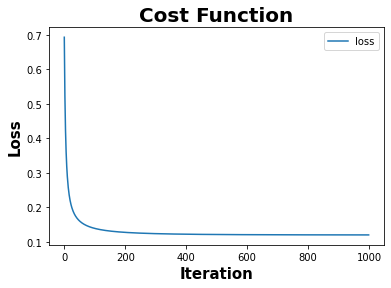

TN, FP, FN, TP: 81572 778 3073 5162
Accuracy = 0.9574874427333444
F1 = 0.7283245149911817
F0.5 = 0.8066885450851695
F2 = 0.6638374485596708
Gmean = 0.787981373918121
Balanced Accu. = 0.8086945962355798
Accuracy = 0.9621
F1 = 0.7398764584763212
F0.5 = 0.8221476510067114
F2 = 0.672572997254804
Gmean = 0.7933505396436134
Balanced Accu. = 0.8133429765348763
82350 7650 90000
################################################## 5th CV ##################################################
82350 8235 90585


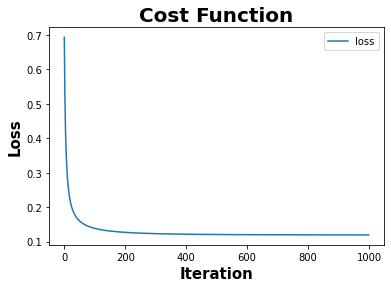

TN, FP, FN, TP: 81595 755 3063 5172
Accuracy = 0.9578517414582989
F1 = 0.7304053099844655
F0.5 = 0.8095670412923018
F2 = 0.6653459232768159
Gmean = 0.7888554457645478
Balanced Accu. = 0.8094414086217365
Accuracy = 0.9582
F1 = 0.7133058984910837
F0.5 = 0.7921998781230957
F2 = 0.6487025948103792
Gmean = 0.7783836246870631
Balanced Accu. = 0.8010736097717777
82350 7650 90000
################################################## 6th CV ##################################################
82350 8235 90585


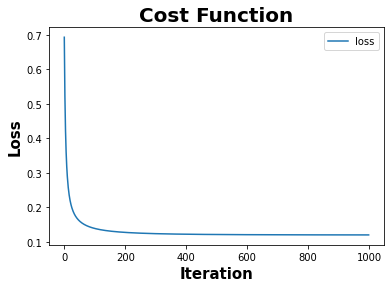

TN, FP, FN, TP: 81592 758 3099 5136
Accuracy = 0.9574212066015345
F1 = 0.7270153584825536
F0.5 = 0.8072679261890541
F2 = 0.661276201266931
Gmean = 0.7860907635551438
Balanced Accu. = 0.8072374013357619
Accuracy = 0.9618
F1 = 0.7460106382978723
F0.5 = 0.8092902481246395
F2 = 0.6919092254563394
Gmean = 0.8082646863983904
Balanced Accu. = 0.8249180327868852
82350 7650 90000
################################################## 7th CV ##################################################
82350 8235 90585


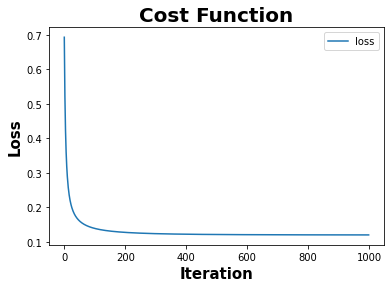

TN, FP, FN, TP: 81577 773 3075 5160
Accuracy = 0.9575205607992493
F1 = 0.7284020327498588
F0.5 = 0.807082303625614
F2 = 0.663699740179559
Gmean = 0.7878528535516119
Balanced Accu. = 0.8086035215543412
Accuracy = 0.9623
F1 = 0.7405368203716449
F0.5 = 0.8246474555487431
F2 = 0.6719960029977516
Gmean = 0.7927451501152055
Balanced Accu. = 0.8129186756669882
82350 7650 90000
################################################## 8th CV ##################################################
82350 8235 90585


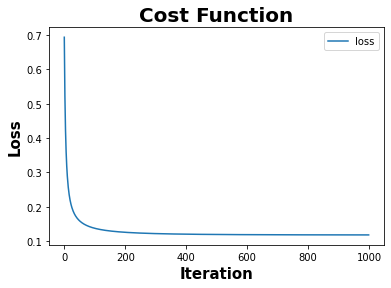

TN, FP, FN, TP: 81586 764 3045 5190
Accuracy = 0.9579510956560137
F1 = 0.7315526111776729
F0.5 = 0.8096471248946991
F2 = 0.6671980254023757
Gmean = 0.7901833892054666
Balanced Accu. = 0.8104796599878568
Accuracy = 0.959
F1 = 0.7199453551912568
F0.5 = 0.7970356926799758
F2 = 0.6564524165421026
Gmean = 0.7836484658523788
Balanced Accu. = 0.8052459016393443
82350 7650 90000
################################################## 9th CV ##################################################
82350 8235 90585


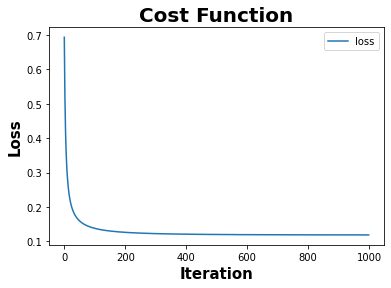

TN, FP, FN, TP: 81578 772 3064 5171
Accuracy = 0.9576530330628691
F1 = 0.7294399774298208
F0.5 = 0.807792045490049
F2 = 0.6649435485945014
Gmean = 0.7886970061373189
Balanced Accu. = 0.8092774741955069
Accuracy = 0.9595
F1 = 0.7227926078028748
F0.5 = 0.8014571948998179
F2 = 0.6581899775617053
Gmean = 0.784564691445314
Balanced Accu. = 0.8060527161684345
82350 7650 90000
################################################## 10th CV ##################################################
82350 8235 90585


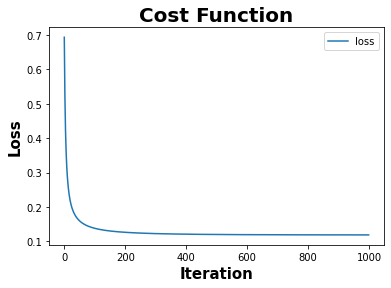

TN, FP, FN, TP: 81591 759 3059 5176
Accuracy = 0.9578517414582989
F1 = 0.7305575158786168
F0.5 = 0.8093823299452697
F2 = 0.6657234726688103
Gmean = 0.7891410917262993
Balanced Accu. = 0.8096599878567092
Accuracy = 0.9601
F1 = 0.7313131313131314
F0.5 = 0.8008849557522124
F2 = 0.6728624535315985
Gmean = 0.795236056607132
Balanced Accu. = 0.8143844423015107


,Delta,MSE,BCE,BCE_train,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
Acc,0,0,0.959950,0.957759,0,0,0,0,0,0
F1,0,0,0.727226,0.729922,0,0,0,0,0,0
F.5,0,0,0.803294,0.808775,0,0,0,0,0,0
F2,0,0,0.664392,0.665079,0,0,0,0,0,0
Gmean,0,0,0.788897,0.788721,0,0,0,0,0,0
B_Acc,0,0,0.809500,0.809319,0,0,0,0,0,0


In [374]:
# train = train data // test = validation data // 10 cross-validation(train 0.9, validate 0.1, 10 times)
# The average of test results are the validation scores.

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)
n_iter=0

X = diab_df.iloc[:, :-1]
y = diab_df.iloc[:, -1]


for train_index, test_index in skf.split(diab_df, diab_df['diabetes']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))
    
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)

    # Resampling
    X_train, y_train = over.fit_resample(X_train, y_train)
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)   
    intercept_r = np.ones((X_train.shape[0],1))
    intercept_t = np.ones((X_test.shape[0],1))
    X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
    X_test_a = np.concatenate((intercept_t,X_test),axis= 1)
    
###################### BCE (with Sigmoid) ##############################       
    theta = np.zeros(X_train_a.shape[1])
    threshold = 0.5
    num_iter = 1000
    cost = []
    lr = 0.5
    yl = y_train.shape[0]
    for i in range(num_iter):
        h = sigmoid(X_train_a,theta)
        cost.append(cost_function(h,y_train))
        gradient = gradient_descent(X_train_a,h,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    
    predicted_r = predict(X_train_a,theta)
    TN = metrics.confusion_matrix(y_train, predicted_r)[0,0]
    FP = metrics.confusion_matrix(y_train, predicted_r)[0,1]
    FN = metrics.confusion_matrix(y_train, predicted_r)[1,0]
    TP = metrics.confusion_matrix(y_train, predicted_r)[1,1]
    bce_train_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_train_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_train_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_train_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_train_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_train_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    
    predicted = predict(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))    
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    

res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'MSE':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'BCE_train':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])


res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res['BCE_train'] = [np.mean(bce_train_acc), np.mean(bce_train_f1), np.mean(bce_train_f5), np.mean(bce_train_f2), np.mean(bce_train_gmean), np.mean(bce_train_bacc)]
D4_01 = res
D4_01

82350 7650 90000
################################################## 1th CV ##################################################
76500 7650 84150


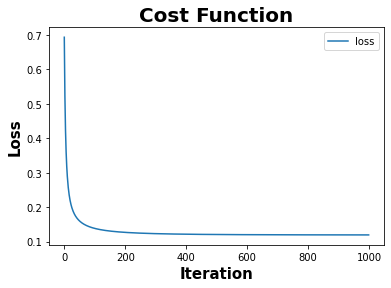

TN, FP, FN, TP: 75807 693 2848 4802
Accuracy = 0.9579203802733215
F1 = 0.7306200076074553
F0.5 = 0.8103273709078637
F2 = 0.6651890843607148
Gmean = 0.788686301564854
Balanced Accu. = 0.8093267973856209
Accuracy = 0.9595
F1 = 0.7239263803680982
F0.5 = 0.8001808318264015
F2 = 0.6609410007468259
Gmean = 0.7866602378393691
Balanced Accu. = 0.807653487624558
82350 7650 90000
################################################## 2th CV ##################################################
76500 7650 84150


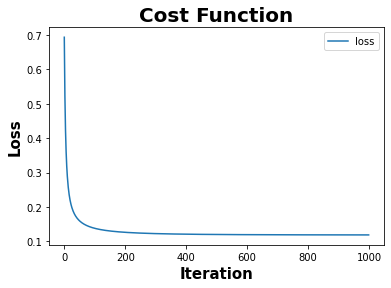

TN, FP, FN, TP: 75805 695 2836 4814
Accuracy = 0.9580392156862745
F1 = 0.7316665400106391
F0.5 = 0.8108199151115004
F2 = 0.6665928161954083
Gmean = 0.789660717027079
Balanced Accu. = 0.8100980392156862
Accuracy = 0.9585
F1 = 0.7205387205387206
F0.5 = 0.7890855457227138
F2 = 0.6629491945477075
Gmean = 0.7890075713231601
Balanced Accu. = 0.8092414014786242
82350 7650 90000
################################################## 3th CV ##################################################
76500 7650 84150


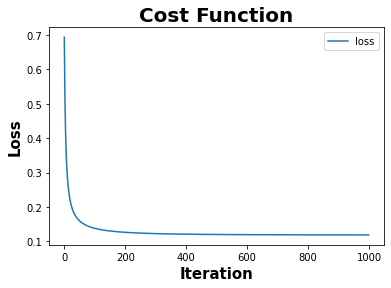

TN, FP, FN, TP: 75796 704 2832 4818
Accuracy = 0.9579797979797979
F1 = 0.7315517764955968
F0.5 = 0.8100746519604547
F2 = 0.6669065943192515
Gmean = 0.7899418199741016
Balanced Accu. = 0.8103006535947712
Accuracy = 0.9588
F1 = 0.7158620689655173
F0.5 = 0.7984615384615384
F2 = 0.64875
Gmean = 0.7779351052403307
Balanced Accu. = 0.8008678881388621
82350 7650 90000
################################################## 4th CV ##################################################
76500 7650 84150


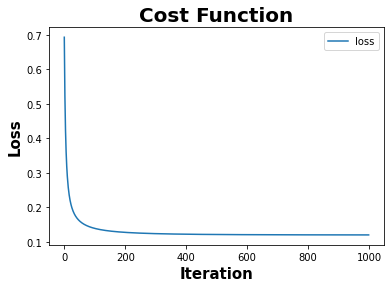

TN, FP, FN, TP: 75776 724 2853 4797
Accuracy = 0.9574925727866904
F1 = 0.7284184951788019
F0.5 = 0.8066523172126185
F2 = 0.6640181611804766
Gmean = 0.7881143990793087
Balanced Accu. = 0.808797385620915
Accuracy = 0.9621
F1 = 0.7398764584763212
F0.5 = 0.8221476510067114
F2 = 0.672572997254804
Gmean = 0.7933505396436134
Balanced Accu. = 0.8133429765348763
82350 7650 90000
################################################## 5th CV ##################################################
76500 7650 84150


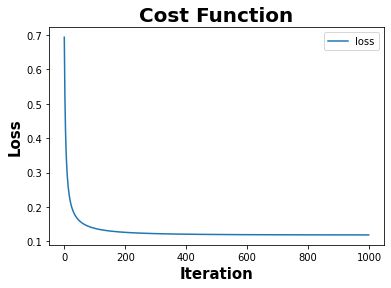

TN, FP, FN, TP: 75799 701 2837 4813
Accuracy = 0.9579560308972074
F1 = 0.7312367061683379
F0.5 = 0.8101057025516731
F2 = 0.6663620756493327
Gmean = 0.7895474472856138
Balanced Accu. = 0.8099934640522876
Accuracy = 0.9582
F1 = 0.7133058984910837
F0.5 = 0.7921998781230957
F2 = 0.6487025948103792
Gmean = 0.7783836246870631
Balanced Accu. = 0.8010736097717777
82350 7650 90000
################################################## 6th CV ##################################################
76500 7650 84150


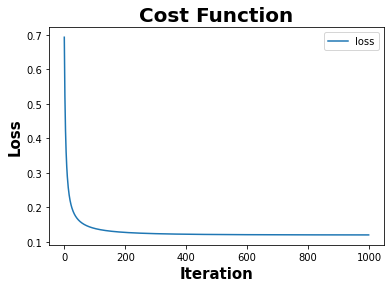

TN, FP, FN, TP: 75797 703 2870 4780
Accuracy = 0.9575401069518716
F1 = 0.7279372572907942
F0.5 = 0.8079237374078833
F2 = 0.6623617770141064
Gmean = 0.786825672442207
Balanced Accu. = 0.8078235294117647
Accuracy = 0.9615
F1 = 0.7441860465116279
F0.5 = 0.8069164265129684
F2 = 0.6905055487053021
Gmean = 0.8074548192421206
Balanced Accu. = 0.8242205078752813
82350 7650 90000
################################################## 7th CV ##################################################
76500 7650 84150


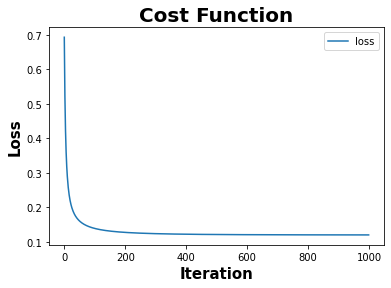

TN, FP, FN, TP: 75782 718 2855 4795
Accuracy = 0.9575401069518716
F1 = 0.7285573197599331
F0.5 = 0.8071847013669113
F2 = 0.6638883504555146
Gmean = 0.7879812833874569
Balanced Accu. = 0.8087058823529412
Accuracy = 0.9623
F1 = 0.7405368203716449
F0.5 = 0.8246474555487431
F2 = 0.6719960029977516
Gmean = 0.7927451501152055
Balanced Accu. = 0.8129186756669882
82350 7650 90000
################################################## 8th CV ##################################################
76500 7650 84150


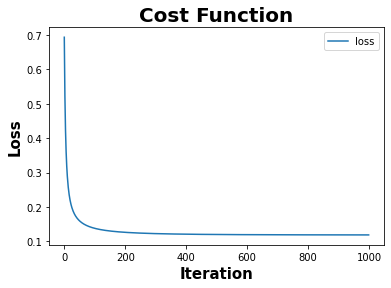

TN, FP, FN, TP: 75794 706 2830 4820
Accuracy = 0.9579797979797979
F1 = 0.7316332726168792
F0.5 = 0.8099751293943671
F2 = 0.6671095609810109
Gmean = 0.7900953351610531
Balanced Accu. = 0.8104183006535948
Accuracy = 0.9591
F1 = 0.7204374572795625
F0.5 = 0.7980012113870382
F2 = 0.6566159980064789
Gmean = 0.7836916980520008
Balanced Accu. = 0.8053005464480874
82350 7650 90000
################################################## 9th CV ##################################################
76500 7650 84150


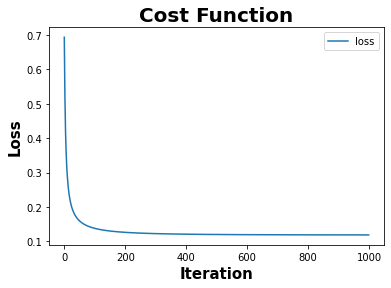

TN, FP, FN, TP: 75783 717 2836 4814
Accuracy = 0.9577777777777777
F1 = 0.7304453379864957
F0.5 = 0.8084234567071942
F2 = 0.6661869308903712
Gmean = 0.7895461217074128
Balanced Accu. = 0.8099542483660132
Accuracy = 0.9596
F1 = 0.7232876712328767
F0.5 = 0.8024316109422492
F2 = 0.6583541147132169
Gmean = 0.78460795509703
Balanced Accu. = 0.8061073609771778
82350 7650 90000
################################################## 10th CV ##################################################
76500 7650 84150


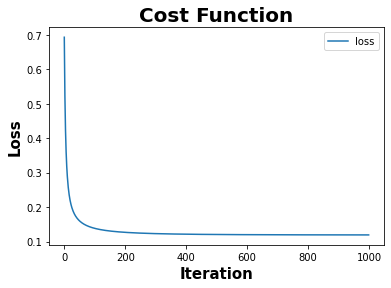

TN, FP, FN, TP: 75797 703 2851 4799
Accuracy = 0.9577658942364825
F1 = 0.7297749391727494
F0.5 = 0.8090565783262527
F2 = 0.664644618026702
Gmean = 0.788387896434594
Balanced Accu. = 0.8090653594771242
Accuracy = 0.96
F1 = 0.7297297297297297
F0.5 = 0.8011869436201781
F2 = 0.6699751861042184
Gmean = 0.7931237753637522
Balanced Accu. = 0.8127290260366442


,Delta,MSE,BCE,BCE_train,AccAim,F1Aim,F.5Aim,F2Aim,GAim,BAim
Acc,0,0,0.959960,0.957799,0,0,0,0,0,0
F1,0,0,0.727169,0.730184,0,0,0,0,0,0
F.5,0,0,0.803526,0.809054,0,0,0,0,0,0
F2,0,0,0.664136,0.665326,0,0,0,0,0,0
Gmean,0,0,0.788696,0.788879,0,0,0,0,0,0
B_Acc,0,0,0.809346,0.809448,0,0,0,0,0,0


In [375]:
bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []
bce_train_acc = []
bce_train_f1 = []
bce_train_f5 = []
bce_train_f2 = []
bce_train_gmean = []
bce_train_bacc = []

# train = train data // test = validation data // 10 cross-validation(train 0.9, validate 0.1, 10 times)
# The average of test results are the validation scores.

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)
n_iter=0

X = diab_df.iloc[:, :-1]
y = diab_df.iloc[:, -1]


for train_index, test_index in skf.split(diab_df, diab_df['diabetes']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))
    
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)

    # Resampling
    X_train, y_train = under.fit_resample(X_train, y_train)
    print(list(y_train).count(0), list(y_train).count(1), len(y_train))

    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)   
    intercept_r = np.ones((X_train.shape[0],1))
    intercept_t = np.ones((X_test.shape[0],1))
    X_train_a = np.concatenate((intercept_r,X_train),axis= 1)
    X_test_a = np.concatenate((intercept_t,X_test),axis= 1)
    
###################### BCE (with Sigmoid) ##############################       
    theta = np.zeros(X_train_a.shape[1])
    threshold = 0.5
    num_iter = 1000
    cost = []
    lr = 0.5
    yl = y_train.shape[0]
    for i in range(num_iter):
        h = sigmoid(X_train_a,theta)
        cost.append(cost_function(h,y_train))
        gradient = gradient_descent(X_train_a,h,y_train,yl)
        theta = update_loss(theta,lr,gradient)
    plot_cost_function(cost)
    
    predicted_r = predict(X_train_a,theta)
    TN = metrics.confusion_matrix(y_train, predicted_r)[0,0]
    FP = metrics.confusion_matrix(y_train, predicted_r)[0,1]
    FN = metrics.confusion_matrix(y_train, predicted_r)[1,0]
    TP = metrics.confusion_matrix(y_train, predicted_r)[1,1]
    bce_train_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_train_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_train_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_train_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_train_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_train_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    
    predicted = predict(X_test_a,theta)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
#     print('Precesion =', TP/(TP+FP))
#     print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))    
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))    
    

res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'MSE':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'BCE_train':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])


res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res['BCE_train'] = [np.mean(bce_train_acc), np.mean(bce_train_f1), np.mean(bce_train_f5), np.mean(bce_train_f2), np.mean(bce_train_gmean), np.mean(bce_train_bacc)]
D4_U_01 = res
D4_U_01

In [376]:
len(bce_f1)

10

In [377]:
print('+'*20)
print(D4_10['BCE'])
print(D4_U_10['BCE'])
print('+'*20)
print(D4_09['BCE'])
print(D4_U_09['BCE'])
print('+'*20)
print(D4_08['BCE'])
print(D4_U_08['BCE'])
print('+'*20)
print(D4_07['BCE'])
print(D4_U_07['BCE'])
print('+'*20)
print(D4_06['BCE'])
print(D4_U_06['BCE'])
print('+'*20)
print(D4_05['BCE'])
print(D4_U_05['BCE'])
print('+'*20)
print(D4_04['BCE'])
print(D4_U_04['BCE'])
print('+'*20)
print(D4_03['BCE'])
print(D4_U_03['BCE'])
print('+'*20)
print(D4_02['BCE'])
print(D4_U_02['BCE'])
print('+'*20)
print(D4_01['BCE'])
print(D4_U_01['BCE'])

++++++++++++++++++++
Acc      0.886460
F1       0.568134
F.5      0.468823
F2       0.720872
Gmean    0.882755
B_Acc    0.882783
Name: BCE, dtype: float64
Acc      0.886550
F1       0.568273
F.5      0.469055
F2       0.720800
Gmean    0.882638
B_Acc    0.882672
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.893460
F1       0.580804
F.5      0.484629
F2       0.724643
Gmean    0.881789
B_Acc    0.881913
Name: BCE, dtype: float64
Acc      0.893540
F1       0.581061
F.5      0.484921
F2       0.724828
Gmean    0.881878
B_Acc    0.882010
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.901000
F1       0.595004
F.5      0.503195
F2       0.727840
Gmean    0.879842
B_Acc    0.880217
Name: BCE, dtype: float64
Acc      0.900930
F1       0.594945
F.5      0.503064
F2       0.727951
Gmean    0.879966
B_Acc    0.880338
Name: BCE, dtype: float64
++++++++++++++++++++
Acc      0.908600
F1       0.610941
F.5      0.524206
F2       0.732127
Gmean    0.878462
B_Acc    0.879194
Name